# Human Capital Flight: More than Two Decades of International Students in the USA.

In 2022/23 international students made up more than 5% of the total U.S. higher education population (more than 1 million people), with the total number of students enrolled in the US in 2022/23 being 20 million. The USA has the world’s largest international student population, with more than 1,000,000 students choosing to relocate to the United States for their education (source: https://www.internationalstudent.com/). 

#The Data
Source: https://www.kaggle.com/datasets/webdevbadger/international-student-demographics

##About the Data
Examining international student demographics in the USA. This dataset provides insights into a variety of aspects including, gender, marital status, Visa type, origin of country, academic level, and much more. Note that the data imported here has already been cleaned and partially formatted.

## Imports: Libraries and Files

In [0]:
# LIBRARIES IMPORTS
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION IMPORT
from pyspark.sql.functions import udf, when, col, sum, expr, lag
from pyspark.sql.window import Window

def update_year_format(date):
    (s_year, f_year) = date.split("/")
    year = s_year
    return year

update_year_udf = udf(update_year_format) # UDF: Change year from YYYY/YY to YYYY with YYYY being the starting academic year.

In [0]:
# FILE IMPORTS
academic = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/academic.csv")
)
academic_detail = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/academic_detail.csv")
)
field = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/field_of_study.csv")
)
origin = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/origin.csv")
)
funding = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/source_of_fund.csv")
)
# Angie has this as source.
status = (
    spark.read.format("csv")
    .option("header", "true")
    .load("/FileStore/tables/status.csv")
)

Let's display the files imported as tables:

In [0]:
display(academic)  # ACADEMIC
display(academic_detail)  # ACADEMIC DETAIL
display(field)  # FIELD OF STUDY
display(origin)  # ORIGIN
display(funding)  # SOURCE OF FUND
display(status)  # STATUS

year students us_students undergraduate graduate non_degree opt 1948/49 25464 2403400.0 null null null null 1949/50 26433 2445000.0 null null null null 1950/51 29813 2281000.0 null null null null 1951/52 30462 2102000.0 null null null null 1952/53 33675 2134000.0 null null null null 1953/54 33833 2231000.0 null null null null 1954/55 34232 2447000.0 19101.0 12118.0 null null 1955/56 36494 2653000.0 null null null null 1956/57 40666 2918000.0 null null null null 1957/58 43391 3324000.0 null null null null 1958/59 47245 null null null null null 1959/60 48486 3640000.0 25164.0 18910.0 null null 1960/61 53107 null null null null null 1961/62 58086 4146000.0 null null null null 1962/63 64705 null null null null null 1963/64 74814 4780000.0 null null null null 1964/65 82045 5280000.0 38130.0 35096.0 null null 1965/66 82709 5921000.0 null null null null 1966/67 100262 6390000.0 null null null null 1967/68 110315 6912000.0 null null null null 1968/69 121362 7513000.0 null null null null 1969/70 134959 8005000.0 63296.0 59112.0 null null 1970/71 144708 8581000.0 null null null null 1971/72 140126 8949000.0 null null null null 1972/73 146097 9215000.0 null null null null 1973/74 151066 9602000.0 null null null null 1974/75 154580 10224000.0 null null null null 1975/76 179344 11185000.0 95949.0 83395.0 null null 1976/77 203068 11012000.0 null null null null 1977/78 235509 11286000.0 null null null null 1978/79 263938 11260000.0 null null null null 1979/80 286343 11570000.0 172520.0 94130.0 16850.0 2840.0 1980/81 311882 12097000.0 186660.0 99110.0 21660.0 3450.0 1981/82 326299 12372000.0 195150.0 106290.0 21980.0 2880.0 1982/83 336985 12426000.0 202760.0 110270.0 20340.0 3620.0 1983/84 338894 12465000.0 197480.0 118820.0 19190.0 3400.0 1984/85 342113 12242000.0 197640.0 122590.0 17570.0 4310.0 1985/86 343777 12247000.0 187660.0 132430.0 19540.0 4150.0 1986/87 349609 12504000.0 181230.0 146100.0 17550.0 4730.0 1987/88 356187 12767000.0 176669.0 156366.0 18352.0 4800.0 1988/89 366354 13055000.0 172551.0 165590.0 21189.0 7020.0 1989/90 386851 13539000.0 184527.0 169827.0 24785.0 7712.0 1990/91 407529 13819000.0 189900.0 182130.0 26730.0 8770.0 1991/92 419585 14359000.0 197070.0 191330.0 22960.0 8230.0 1992/93 438618 14487000.0 210080.0 193330.0 24200.0 11010.0 1993/94 449749 14305000.0 213610.0 201030.0 23680.0 11430.0 1994/95 452635 14279000.0 221500.0 191738.0 26188.0 13209.0 1995/96 453787 14262000.0 218620.0 190092.0 29625.0 15450.0 1996/97 457984 14368000.0 218743.0 190244.0 30872.0 18125.0 1997/98 481280 14502000.0 223276.0 207510.0 33912.0 16582.0 1998/99 490933 14507000.0 235802.0 211426.0 26863.0 16842.0 1999/00 514723 14791000.0 237211.0 218219.0 34436.0 24857.0 2000/01 547867 15312000.0 254429.0 238497.0 33883.0 21058.0 2001/02 582996 15928000.0 261079.0 264749.0 34423.0 22745.0 2002/03 586323 16612000.0 260103.0 267876.0 30551.0 27793.0 2003/04 572509 16911000.0 248200.0 274310.0 20659.0 29340.0 2004/05 565039 17272000.0 239212.0 264410.0 28418.0 32999.0 2005/06 564766 17487000.0 236342.0 259717.0 30611.0 38096.0 2006/07 582984 17672000.0 238050.0 264288.0 38986.0 41660.0 2007/08 623805 18248000.0 243360.0 276842.0 46837.0 56766.0 2008/09 671616 19103000.0 269874.0 283329.0 51812.0 66601.0 2009/10 690923 20428000.0 274431.0 293885.0 54803.0 67804.0 2010/11 723277 20550000.0 291439.0 296574.0 59233.0 76031.0 2011/12 764495 20625000.0 309342.0 300430.0 69566.0 85157.0 2012/13 819644 21253000.0 339993.0 311204.0 73528.0 94919.0 2013/14 886052 21216000.0 370724.0 329854.0 79477.0 105997.0 2014/15 974926 20300000.0 398824.0 362228.0 93587.0 120287.0 2015/16 1043839 20264000.0 427313.0 383935.0 85093.0 147498.0 2016/17 1078822 20185000.0 439019.0 391124.0 72984.0 175695.0 2017/18 1094792 19831000.0 442746.0 382953.0 65631.0 203462.0 2018/19 1095299 19828000.0 431930.0 377943.0 62341.0 223085.0 2019/20 1075496 19720000.0 419321.0 374435.0 58201.0 223539.0 2020/21 914095 19744000.0 359787.0 329272.0 21151.0 203885.0 2021/22 948519 203270

year academic_type academic_level students 1999/00 Undergraduate Associate's 59830 1999/00 Undergraduate Bachelor's 177381 1999/00 Graduate Master's 110857 1999/00 Graduate Doctoral 72928 1999/00 Graduate Professional 9475 1999/00 Graduate Graduate, Unspecified 24959 1999/00 Non-Degree Non-Degree, Intensive English 20852 1999/00 Non-Degree Non-Degree, Other 13584 1999/00 OPT OPT 24857 2000/01 Undergraduate Associate's 67493 2000/01 Undergraduate Bachelor's 186936 2000/01 Graduate Master's 123920 2000/01 Graduate Doctoral 77211 2000/01 Graduate Professional 8005 2000/01 Graduate Graduate, Unspecified 29361 2000/01 Non-Degree Non-Degree, Intensive English 21716 2000/01 Non-Degree Non-Degree, Other 12168 2000/01 OPT OPT 21058 2001/02 Undergraduate Associate's 67667 2001/02 Undergraduate Bachelor's 193411 2001/02 Graduate Master's 138791 2001/02 Graduate Doctoral 81824 2001/02 Graduate Professional 7948 2001/02 Graduate Graduate, Unspecified 36185 2001/02 Non-Degree Non-Degree, Intensive English 20410 2001/02 Non-Degree Non-Degree, Other 14013 2001/02 OPT OPT 22745 2002/03 Undergraduate Associate's 72494 2002/03 Undergraduate Bachelor's 187609 2002/03 Graduate Master's 138634 2002/03 Graduate Doctoral 92203 2002/03 Graduate Professional 7796 2002/03 Graduate Graduate, Unspecified 29243 2002/03 Non-Degree Non-Degree, Intensive English 16856 2002/03 Non-Degree Non-Degree, Other 13695 2002/03 OPT OPT 27793 2003/04 Undergraduate Associate's 69541 2003/04 Undergraduate Bachelor's 178659 2003/04 Graduate Master's 142271 2003/04 Graduate Doctoral 100092 2003/04 Graduate Professional 8212 2003/04 Graduate Graduate, Unspecified 23735 2003/04 Non-Degree Non-Degree, Intensive English 10224 2003/04 Non-Degree Non-Degree, Other 10435 2003/04 OPT OPT 29340 2004/05 Undergraduate Associate's 65667 2004/05 Undergraduate Bachelor's 173545 2004/05 Graduate Master's 121523 2004/05 Graduate Doctoral 102084 2004/05 Graduate Professional 7675 2004/05 Graduate Graduate, Unspecified 33128 2004/05 Non-Degree Non-Degree, Intensive English 12896 2004/05 Non-Degree Non-Degree, Other 15522 2004/05 OPT OPT 32999 2005/06 Undergraduate Associate's 63598 2005/06 Undergraduate Bachelor's 172744 2005/06 Graduate Master's 115434 2005/06 Graduate Doctoral 107993 2005/06 Graduate Professional 8463 2005/06 Graduate Graduate, Unspecified 27827 2005/06 Non-Degree Non-Degree, Intensive English 15217 2005/06 Non-Degree Non-Degree, Other 15394 2005/06 OPT OPT 38096 2006/07 Undergraduate Associate's 67855 2006/07 Undergraduate Bachelor's 170195 2006/07 Graduate Master's 122385 2006/07 Graduate Doctoral 108033 2006/07 Graduate Professional 7415 2006/07 Graduate Graduate, Unspecified 26455 2006/07 Non-Degree Non-Degree, Intensive English 19819 2006/07 Non-Degree Non-Degree, Other 19167 2006/07 OPT OPT 41660 2007/08 Undergraduate Associate's 65378 2007/08 Undergraduate Bachelor's 177982 2007/08 Graduate Master's 133698 2007/08 Graduate Doctoral 108976 2007/08 Graduate Professional 9472 2007/08 Graduate Graduate, Unspecified 24696 2007/08 Non-Degree Non-Degree, Intensive English 24468 2007/08 Non-Degree Non-Degree, Other 22369 2007/08 OPT OPT 56766 2008/09 Undergraduate Associate's 74048 2008/09 Undergraduate Bachelor's 195826 2008/09 Graduate Master's 143709 2008/09 Graduate Doctoral 108290 2008/09 Graduate Professional 9980 2008/09 Graduate Graduate, Unspecified 21350 2008/09 Non-Degree Non-Degree, Intensive English 26800 2008/09 Non-Degree Non-Degree, Other 25012 2008/09 OPT OPT 66601 2009/10 Undergraduate Associate's 68562 2009/10 Undergraduate Bachelor's 205869 2009/10 Graduate Master's 151252 2009/10 Graduate Doctoral 116254 2009/10 Graduate Professional 10695 2009/10 Graduate Graduate, Unspecified 15684 2009/10 Non-Degree Non-Degree, Intensive English 26059 2009/10 Non-Degree Non-Degree, Other 28744 2009/10 OPT OPT 67804 2010/11 Undergraduate Associate's 71586 2010/11 Undergraduate Bachelor's 219853 2010/11 Graduate Master's 154854 2010/11 Graduate Doctoral 119641 2010/11 

year field_of_study major students 1998/99 Agriculture Agriculture 6146 1998/99 Agriculture Natural Resources and Conservation 1803 1998/99 Business and Management Business and Management 101360 1998/99 Communications and Journalism Communication, Journalism 9473 1998/99 Communications and Journalism Communications Technologies/Technicians 1761 1998/99 Education Education 13261 1998/99 Engineering Construction Trades 223 1998/99 Engineering Engineering 66264 1998/99 Engineering Engineering Technologies/Technicians 5028 1998/99 Engineering Mechanic and Repair Technologies/Technicians 476 1998/99 Engineering Military Technologies 58 1998/99 Engineering Precision Production 161 1998/99 Engineering Transportation and Materials Moving 804 1998/99 Fine and Applied Arts Architecture 6454 1998/99 Fine and Applied Arts Visual and Performing Arts 25032 1998/99 Health Professions Health Professions 20260 1998/99 Health Professions Residency Programs null 1998/99 Humanities English Language and Literature/Letters 5762 1998/99 Humanities Foreign Languages, Literatures and Linguistics 5066 1998/99 Humanities Philosophy and Religious Studies 1933 1998/99 Humanities Theology and Religious Vocations 3534 1998/99 Intensive English Intensive English 21030 1998/99 Legal Studies and Law Enforcement Homeland Security, Law Enforcement, and Firefighting 530 1998/99 Legal Studies and Law Enforcement Legal Professions and Studies 4873 1998/99 Math and Computer Science Computer and Information Sciences 40085 1998/99 Math and Computer Science Mathematics and Statistics 8151 1998/99 Other Fields of Study Basic Skills null 1998/99 Other Fields of Study Family and Consumer Sciences/Human Sciences 3046 1998/99 Other Fields of Study Liberal Arts and Sciences/General Studies 25632 1998/99 Other Fields of Study Library Science 651 1998/99 Other Fields of Study Multi/Interdisciplinary Studies 3799 1998/99 Other Fields of Study Parks, Recreation, Leisure and Fitness Studies 2277 1998/99 Other Fields of Study Personal and Culinary Services 723 1998/99 Other Fields of Study Reserve Officer Training Corps null 1998/99 Physical and Life Sciences Biological and Biomedical Sciences 18825 1998/99 Physical and Life Sciences Physical Sciences 17265 1998/99 Physical and Life Sciences Science Technologies/Technicians 965 1998/99 Social Sciences Area, Ethnic, Cultural and Gender Studies 2170 1998/99 Social Sciences History null 1998/99 Social Sciences Psychology 7500 1998/99 Social Sciences Public Administration and Social Service Professions 4032 1998/99 Social Sciences Social Sciences 23553 1998/99 Undeclared Undeclared 30970 1999/00 Agriculture Agriculture 5850 1999/00 Agriculture Natural Resources and Conservation 1879 1999/00 Business and Management Business and Management 102492 1999/00 Communications and Journalism Communication, Journalism 9714 1999/00 Communications and Journalism Communications Technologies/Technicians 1563 1999/00 Education Education 12885 1999/00 Engineering Construction Trades 276 1999/00 Engineering Engineering 69593 1999/00 Engineering Engineering Technologies/Technicians 5042 1999/00 Engineering Mechanic and Repair Technologies/Technicians 602 1999/00 Engineering Military Technologies 85 1999/00 Engineering Precision Production 101 1999/00 Engineering Transportation and Materials Moving 1135 1999/00 Fine and Applied Arts Architecture 6189 1999/00 Fine and Applied Arts Visual and Performing Arts 26290 1999/00 Health Professions Health Professions 21625 1999/00 Health Professions Residency Programs null 1999/00 Humanities English Language and Literature/Letters 5566 1999/00 Humanities Foreign Languages, Literatures and Linguistics 5261 1999/00 Humanities Philosophy and Religious Studies 1809 1999/00 Humanities Theology and Religious Vocations 4050 1999/00 Intensive English Intensive English 21015 1999/00 Legal Studies and Law Enforcement Homeland Security, Law Enforcement, and Firefighting 619 1999/00 Legal Studies and Law Enforcement Legal Pro

year origin_region origin academic_type students 2000/01 Africa, Subsaharan Africa, Subsaharan, Unspecified Graduate 2 2000/01 Africa, Subsaharan Africa, Subsaharan, Unspecified Other 0 2000/01 Africa, Subsaharan Africa, Subsaharan, Unspecified Undergraduate 6 2000/01 Asia Asia, Unspecified Graduate 0 2000/01 Asia Asia, Unspecified Other 6 2000/01 Asia Asia, Unspecified Undergraduate 0 2000/01 Caribbean Anguilla Graduate 5 2000/01 Caribbean Anguilla Other 1 2000/01 Caribbean Anguilla Undergraduate 59 2000/01 Caribbean Antigua and Barbuda Graduate 32 2000/01 Caribbean Antigua and Barbuda Other 4 2000/01 Caribbean Antigua and Barbuda Undergraduate 236 2000/01 Caribbean Aruba Graduate 4 2000/01 Caribbean Aruba Other 3 2000/01 Caribbean Aruba Undergraduate 78 2000/01 Caribbean Bahamas Graduate 229 2000/01 Caribbean Bahamas Other 31 2000/01 Caribbean Bahamas Undergraduate 1503 2000/01 Caribbean Barbados Graduate 136 2000/01 Caribbean Barbados Other 15 2000/01 Caribbean Barbados Undergraduate 496 2000/01 Caribbean Bermuda Graduate 94 2000/01 Caribbean Bermuda Other 12 2000/01 Caribbean Bermuda Undergraduate 502 2000/01 Caribbean British Virgin Islands Graduate 9 2000/01 Caribbean British Virgin Islands Other 5 2000/01 Caribbean British Virgin Islands Undergraduate 70 2000/01 Caribbean Caribbean, Unspecified Graduate 17 2000/01 Caribbean Caribbean, Unspecified Other 0 2000/01 Caribbean Caribbean, Unspecified Undergraduate 81 2000/01 Caribbean Cayman Islands Graduate 17 2000/01 Caribbean Cayman Islands Other 1 2000/01 Caribbean Cayman Islands Undergraduate 224 2000/01 Caribbean Cuba Graduate 29 2000/01 Caribbean Cuba Other 6 2000/01 Caribbean Cuba Undergraduate 481 2000/01 Caribbean Dominica Graduate 64 2000/01 Caribbean Dominica Other 7 2000/01 Caribbean Dominica Undergraduate 187 2000/01 Caribbean Dominican Republic Graduate 204 2000/01 Caribbean Dominican Republic Other 76 2000/01 Caribbean Dominican Republic Undergraduate 589 2000/01 Caribbean Grenada Graduate 44 2000/01 Caribbean Grenada Other 7 2000/01 Caribbean Grenada Undergraduate 229 2000/01 Caribbean Guadeloupe Graduate 2 2000/01 Caribbean Guadeloupe Other 0 2000/01 Caribbean Guadeloupe Undergraduate 7 2000/01 Caribbean Haiti Graduate 146 2000/01 Caribbean Haiti Other 32 2000/01 Caribbean Haiti Undergraduate 833 2000/01 Caribbean Jamaica Graduate 883 2000/01 Caribbean Jamaica Other 124 2000/01 Caribbean Jamaica Undergraduate 3219 2000/01 Caribbean Martinique Graduate 0 2000/01 Caribbean Martinique Other 0 2000/01 Caribbean Martinique Undergraduate 8 2000/01 Caribbean Montserrat Graduate 4 2000/01 Caribbean Montserrat Other 0 2000/01 Caribbean Montserrat Undergraduate 6 2000/01 Caribbean Netherlands Antilles Graduate 56 2000/01 Caribbean Netherlands Antilles Other 11 2000/01 Caribbean Netherlands Antilles Undergraduate 285 2000/01 Caribbean St. Kitts and Nevis Graduate 35 2000/01 Caribbean St. Kitts and Nevis Other 2 2000/01 Caribbean St. Kitts and Nevis Undergraduate 234 2000/01 Caribbean St. Lucia Graduate 37 2000/01 Caribbean St. Lucia Other 9 2000/01 Caribbean St. Lucia Undergraduate 221 2000/01 Caribbean St. Vincent and the Grenadines Graduate 16 2000/01 Caribbean St. Vincent and the Grenadines Other 1 2000/01 Caribbean St. Vincent and the Grenadines Undergraduate 122 2000/01 Caribbean Trinidad and Tobago Graduate 494 2000/01 Caribbean Trinidad and Tobago Other 76 2000/01 Caribbean Trinidad and Tobago Undergraduate 2330 2000/01 Caribbean Turks and Caicos Graduate 11 2000/01 Caribbean Turks and Caicos Other 0 2000/01 Caribbean Turks and Caicos Undergraduate 37 2000/01 Central Africa Cameroon Graduate 260 2000/01 Central Africa Cameroon Other 40 2000/01 Central Africa Cameroon Undergraduate 570 2000/01 Central Africa Central Africa, Unspecified Graduate 0 2000/01 Central Africa Central Africa, Unspecified Other 0 2000/01 Central Africa Central Africa, Unspecified Undergraduate 6 2000/01 Central Africa Central African Republic Graduate 4 2000/01 Central Africa Central Afri

year academic_type source_type source_of_fund students 1999/00 Undergraduate International Personal and Family 201578 1999/00 Undergraduate International Foreign Government or University 9742 1999/00 Undergraduate International Foreign Private Sponsor 6245 1999/00 Undergraduate International International Organization 749 1999/00 Undergraduate U.S. Current Employment 749 1999/00 Undergraduate U.S. U.S. College or University 20482 1999/00 Undergraduate U.S. U.S. Government 1499 1999/00 Undergraduate U.S. U.S. Private Sponsor 7993 1999/00 Undergraduate Other Other Sources 749 1999/00 Graduate International Personal and Family 106380 1999/00 Graduate International Foreign Government or University 12171 1999/00 Graduate International Foreign Private Sponsor 6311 1999/00 Graduate International International Organization 1578 1999/00 Graduate U.S. Current Employment 3832 1999/00 Graduate U.S. U.S. College or University 84969 1999/00 Graduate U.S. U.S. Government 1803 1999/00 Graduate U.S. U.S. Private Sponsor 5409 1999/00 Graduate Other Other Sources 2930 1999/00 Other International Personal and Family 25789 1999/00 Other International Foreign Government or University 1543 1999/00 Other International Foreign Private Sponsor 1226 1999/00 Other International International Organization 514 1999/00 Other U.S. Current Employment 6922 1999/00 Other U.S. U.S. College or University 2294 1999/00 Other U.S. U.S. Government 119 1999/00 Other U.S. U.S. Private Sponsor 356 1999/00 Other Other Other Sources 791 2000/01 Undergraduate International Personal and Family 210765 2000/01 Undergraduate International Foreign Government or University 9391 2000/01 Undergraduate International Foreign Private Sponsor 7043 2000/01 Undergraduate International International Organization 783 2000/01 Undergraduate U.S. Current Employment 1043 2000/01 Undergraduate U.S. U.S. College or University 21911 2000/01 Undergraduate U.S. U.S. Government 1043 2000/01 Undergraduate U.S. U.S. Private Sponsor 7304 2000/01 Undergraduate Other Other Sources 1565 2000/01 Graduate International Personal and Family 114866 2000/01 Graduate International Foreign Government or University 10998 2000/01 Graduate International Foreign Private Sponsor 5132 2000/01 Graduate International International Organization 1222 2000/01 Graduate U.S. Current Employment 3422 2000/01 Graduate U.S. U.S. College or University 97515 2000/01 Graduate U.S. U.S. Government 2200 2000/01 Graduate U.S. U.S. Private Sponsor 5621 2000/01 Graduate Other Other Sources 3422 2000/01 Other International Personal and Family 27747 2000/01 Other International Foreign Government or University 1662 2000/01 Other International Foreign Private Sponsor 895 2000/01 Other International International Organization 341 2000/01 Other U.S. Current Employment 8055 2000/01 Other U.S. U.S. College or University 2600 2000/01 Other U.S. U.S. Government 341 2000/01 Other U.S. U.S. Private Sponsor 426 2000/01 Other Other Other Sources 554 2001/02 Undergraduate International Personal and Family 216903 2001/02 Undergraduate International Foreign Government or University 9431 2001/02 Undergraduate International Foreign Private Sponsor 5928 2001/02 Undergraduate International International Organization 539 2001/02 Undergraduate U.S. Current Employment 539 2001/02 Undergraduate U.S. U.S. College or University 24789 2001/02 Undergraduate U.S. U.S. Government 1347 2001/02 Undergraduate U.S. U.S. Private Sponsor 9431 2001/02 Undergraduate Other Other Sources 539 2001/02 Graduate International Personal and Family 139388 2001/02 Graduate International Foreign Government or University 10576 2001/02 Graduate International Foreign Private Sponsor 5152 2001/02 Graduate International International Organization 1356 2001/02 Graduate U.S. Current Employment 4068 2001/02 Graduate U.S. U.S. College or University 102778 2001/02 Graduate U.S. U.S. Government 2441 2001/02 Graduate U.S. U.S. Private Sponsor 4881 2001/02 Graduate Other Other Sources 542 2001/02 O

year female male single married full_time part_time visa_f visa_j visa_other 2007/08 278841.0 344964.0 543958.0 79847.0 575772.0 48033.0 552691.0 31814.0 39300.0 2008/09 304242.0 367374.0 591694.0 79922.0 613185.0 58431.0 589007.0 39625.0 42984.0 2009/10 309534.0 381389.0 615612.0 75311.0 637722.0 53201.0 612158.0 38692.0 40073.0 2010/11 322582.0 400695.0 653842.0 69435.0 669031.0 54246.0 645163.0 40504.0 37610.0 2011/12 338671.0 425824.0 690339.0 74156.0 714038.0 50457.0 688810.0 42047.0 33638.0 2012/13 363922.0 455722.0 744237.0 75407.0 769646.0 49998.0 747515.0 42621.0 29508.0 2013/14 390749.0 495303.0 806307.0 79745.0 829345.0 56707.0 804535.0 49619.0 31898.0 2014/15 426043.0 548883.0 886208.0 88718.0 912531.0 62395.0 881333.0 58496.0 35097.0 2015/16 451982.0 591857.0 950937.0 92902.0 971814.0 72025.0 957200.0 52192.0 34447.0 2016/17 470366.0 608456.0 970940.0 107882.0 1007620.0 71202.0 994674.0 45311.0 38837.0 2017/18 477329.0 617463.0 999545.0 95247.0 1028010.0 66782.0 1015967.0 44886.0 33939.0 2018/19 480836.0 614463.0 1002199.0 93100.0 1030676.0 64623.0 1018628.0 44907.0 31764.0 2019/20 477520.0 597976.0 987305.0 88191.0 1016344.0 59152.0 1000211.0 44095.0 31190.0 2020/21 407686.0 506409.0 827256.0 86839.0 843710.0 70385.0 860163.0 16454.0 37478.0 2021/22 428731.0 519788.0 861255.0 87264.0 884020.0 64499.0 884020.0 27507.0 36992.0 2022/23 473620.0 583568.0 966270.0 90918.0 986356.0 70832.0 989528.0 34887.0 32773.0

The current dataset could be simplified to improve readability, analysis and visualisation. 
- Rename attributes
- Rename values

In [0]:
# RENAME

# ACADEMIC:
academic = academic.withColumnRenamed("students", "int_students")
academic = academic.withColumnRenamed("year", "start_year")

# ACADEMIC DETAIL
academic_detail = academic_detail.withColumnRenamed("students", "int_students")
academic_detail = academic_detail.withColumnRenamed("year", "start_year")
academic_detail = academic_detail.withColumn(
    "academic_type",
    when(col("academic_type") == "OPT", "Optional Practical Training").otherwise(
        col("academic_type")
    ),
)
academic_detail = academic_detail.withColumn(
    "academic_level",
    when(col("academic_level") == "OPT", "Optional Practical Training").otherwise(
        col("academic_level")
    ),
)
academic_detail = academic_detail.withColumn(
    "academic_level",
    when(col("academic_level") == "Non-Degree, Other", "Other").otherwise(
        col("academic_level")
    ),
)
academic_detail = academic_detail.withColumn(
    "academic_level",
    when(
        col("academic_level") == "Non-Degree, Intensive English", "Intensive English"
    ).otherwise(col("academic_level")),
)

# FIELD
field = field.withColumnRenamed("students", "int_students")
field = field.withColumnRenamed("year", "start_year")

# ORIGIN
origin = origin.withColumnRenamed("students", "int_students")
origin = origin.withColumnRenamed("year", "start_year")
origin = origin.withColumnRenamed("origin_region", "region")
origin = origin.withColumnRenamed("origin", "country")

# FUNDING
funding = funding.withColumnRenamed("year", "start_year")

# STATUS
status = status.withColumnRenamed("year", "start_year")

- Modify column data type 
- Modify column values

In [0]:
# CHANGE COLUMN DATA & VALUES

# ACADEMIC
# from string to int
academic = academic.withColumn("int_students", academic["int_students"].cast("int"))
academic = academic.withColumn("us_students", academic["us_students"].cast("int"))
academic = academic.withColumn("undergraduate", academic["undergraduate"].cast("int"))
academic = academic.withColumn("graduate", academic["graduate"].cast("int"))
academic = academic.withColumn("non_degree", academic["non_degree"].cast("int"))
academic = academic.withColumn("opt", academic["opt"].cast("int"))
# Apply the UDF to the year column
academic = academic.withColumn("start_year", update_year_udf(academic["start_year"]))

# ACADEMIC_DETAIL
academic_detail = academic_detail.withColumn(
    "int_students", academic_detail["int_students"].cast("int")
)
# Apply the UDF to the year column
academic_detail = academic_detail.withColumn(
    "start_year", update_year_udf(academic_detail["start_year"])
)

# FIELD
field = field.withColumn("int_students", field["int_students"].cast("int"))
field = field.withColumn("start_year", update_year_udf(field["start_year"]))

# ORIGIN
origin = origin.withColumn("int_students", origin["int_students"].cast("int"))
origin = origin.withColumn("start_year", update_year_udf(origin["start_year"]))
origin = origin.filter(origin.int_students != 0)  # removes null values in students

# FUNDING
funding = funding.withColumn("students", funding["students"].cast("int"))
funding = funding.withColumn("start_year", update_year_udf(funding["start_year"]))

# STATUS
status = status.withColumn("female", status["female"].cast("int"))
status = status.withColumn("male", status["male"].cast("int"))
status = status.withColumn("single", status["single"].cast("int"))
status = status.withColumn("married", status["married"].cast("int"))
status = status.withColumn("full_time", status["full_time"].cast("int"))
status = status.withColumn("part_time", status["part_time"].cast("int"))
status = status.withColumn("visa_f", status["visa_f"].cast("int"))
status = status.withColumn("visa_j", status["visa_j"].cast("int"))
status = status.withColumn("visa_other", status["visa_other"].cast("int"))
status = status.withColumn("start_year", update_year_udf(status["start_year"]))

An alternative way to update the start_year column value in our DataFrames would be to simply remove the last 3 digits of the value. This is possible as start_year is a string.

The code would look as follows:
> df = df.withColumn("start_year", expr("substr(year, 0, 4)"))

Note: if using the above string you do not need the 'udf' function.

In [0]:
display(academic)  # ACADEMIC
display(academic_detail)  # ACADEMIC DETAIL
display(field)  # FIELD OF STUDY
display(origin)  # ORIGIN
display(funding)  # SOURCE OF FUND
display(status)  # STATUS

start_year int_students us_students undergraduate graduate non_degree opt 1948 25464 2403400 null null null null 1949 26433 2445000 null null null null 1950 29813 2281000 null null null null 1951 30462 2102000 null null null null 1952 33675 2134000 null null null null 1953 33833 2231000 null null null null 1954 34232 2447000 19101 12118 null null 1955 36494 2653000 null null null null 1956 40666 2918000 null null null null 1957 43391 3324000 null null null null 1958 47245 null null null null null 1959 48486 3640000 25164 18910 null null 1960 53107 null null null null null 1961 58086 4146000 null null null null 1962 64705 null null null null null 1963 74814 4780000 null null null null 1964 82045 5280000 38130 35096 null null 1965 82709 5921000 null null null null 1966 100262 6390000 null null null null 1967 110315 6912000 null null null null 1968 121362 7513000 null null null null 1969 134959 8005000 63296 59112 null null 1970 144708 8581000 null null null null 1971 140126 8949000 null null null null 1972 146097 9215000 null null null null 1973 151066 9602000 null null null null 1974 154580 10224000 null null null null 1975 179344 11185000 95949 83395 null null 1976 203068 11012000 null null null null 1977 235509 11286000 null null null null 1978 263938 11260000 null null null null 1979 286343 11570000 172520 94130 16850 2840 1980 311882 12097000 186660 99110 21660 3450 1981 326299 12372000 195150 106290 21980 2880 1982 336985 12426000 202760 110270 20340 3620 1983 338894 12465000 197480 118820 19190 3400 1984 342113 12242000 197640 122590 17570 4310 1985 343777 12247000 187660 132430 19540 4150 1986 349609 12504000 181230 146100 17550 4730 1987 356187 12767000 176669 156366 18352 4800 1988 366354 13055000 172551 165590 21189 7020 1989 386851 13539000 184527 169827 24785 7712 1990 407529 13819000 189900 182130 26730 8770 1991 419585 14359000 197070 191330 22960 8230 1992 438618 14487000 210080 193330 24200 11010 1993 449749 14305000 213610 201030 23680 11430 1994 452635 14279000 221500 191738 26188 13209 1995 453787 14262000 218620 190092 29625 15450 1996 457984 14368000 218743 190244 30872 18125 1997 481280 14502000 223276 207510 33912 16582 1998 490933 14507000 235802 211426 26863 16842 1999 514723 14791000 237211 218219 34436 24857 2000 547867 15312000 254429 238497 33883 21058 2001 582996 15928000 261079 264749 34423 22745 2002 586323 16612000 260103 267876 30551 27793 2003 572509 16911000 248200 274310 20659 29340 2004 565039 17272000 239212 264410 28418 32999 2005 564766 17487000 236342 259717 30611 38096 2006 582984 17672000 238050 264288 38986 41660 2007 623805 18248000 243360 276842 46837 56766 2008 671616 19103000 269874 283329 51812 66601 2009 690923 20428000 274431 293885 54803 67804 2010 723277 20550000 291439 296574 59233 76031 2011 764495 20625000 309342 300430 69566 85157 2012 819644 21253000 339993 311204 73528 94919 2013 886052 21216000 370724 329854 79477 105997 2014 974926 20300000 398824 362228 93587 120287 2015 1043839 20264000 427313 383935 85093 147498 2016 1078822 20185000 439019 391124 72984 175695 2017 1094792 19831000 442746 382953 65631 203462 2018 1095299 19828000 431930 377943 62341 223085 2019 1075496 19720000 419321 374435 58201 223539 2020 914095 19744000 359787 329272 21151 203885 2021 948519 20327000 344532 385097 34131 184759 2022 1057188 18961280 347602 467027 43766 198793

Databricks visualization. Run in Databricks to view.

start_year academic_type academic_level int_students 1999 Undergraduate Associate's 59830 1999 Undergraduate Bachelor's 177381 1999 Graduate Master's 110857 1999 Graduate Doctoral 72928 1999 Graduate Professional 9475 1999 Graduate Graduate, Unspecified 24959 1999 Non-Degree Intensive English 20852 1999 Non-Degree Other 13584 1999 Optional Practical Training Optional Practical Training 24857 2000 Undergraduate Associate's 67493 2000 Undergraduate Bachelor's 186936 2000 Graduate Master's 123920 2000 Graduate Doctoral 77211 2000 Graduate Professional 8005 2000 Graduate Graduate, Unspecified 29361 2000 Non-Degree Intensive English 21716 2000 Non-Degree Other 12168 2000 Optional Practical Training Optional Practical Training 21058 2001 Undergraduate Associate's 67667 2001 Undergraduate Bachelor's 193411 2001 Graduate Master's 138791 2001 Graduate Doctoral 81824 2001 Graduate Professional 7948 2001 Graduate Graduate, Unspecified 36185 2001 Non-Degree Intensive English 20410 2001 Non-Degree Other 14013 2001 Optional Practical Training Optional Practical Training 22745 2002 Undergraduate Associate's 72494 2002 Undergraduate Bachelor's 187609 2002 Graduate Master's 138634 2002 Graduate Doctoral 92203 2002 Graduate Professional 7796 2002 Graduate Graduate, Unspecified 29243 2002 Non-Degree Intensive English 16856 2002 Non-Degree Other 13695 2002 Optional Practical Training Optional Practical Training 27793 2003 Undergraduate Associate's 69541 2003 Undergraduate Bachelor's 178659 2003 Graduate Master's 142271 2003 Graduate Doctoral 100092 2003 Graduate Professional 8212 2003 Graduate Graduate, Unspecified 23735 2003 Non-Degree Intensive English 10224 2003 Non-Degree Other 10435 2003 Optional Practical Training Optional Practical Training 29340 2004 Undergraduate Associate's 65667 2004 Undergraduate Bachelor's 173545 2004 Graduate Master's 121523 2004 Graduate Doctoral 102084 2004 Graduate Professional 7675 2004 Graduate Graduate, Unspecified 33128 2004 Non-Degree Intensive English 12896 2004 Non-Degree Other 15522 2004 Optional Practical Training Optional Practical Training 32999 2005 Undergraduate Associate's 63598 2005 Undergraduate Bachelor's 172744 2005 Graduate Master's 115434 2005 Graduate Doctoral 107993 2005 Graduate Professional 8463 2005 Graduate Graduate, Unspecified 27827 2005 Non-Degree Intensive English 15217 2005 Non-Degree Other 15394 2005 Optional Practical Training Optional Practical Training 38096 2006 Undergraduate Associate's 67855 2006 Undergraduate Bachelor's 170195 2006 Graduate Master's 122385 2006 Graduate Doctoral 108033 2006 Graduate Professional 7415 2006 Graduate Graduate, Unspecified 26455 2006 Non-Degree Intensive English 19819 2006 Non-Degree Other 19167 2006 Optional Practical Training Optional Practical Training 41660 2007 Undergraduate Associate's 65378 2007 Undergraduate Bachelor's 177982 2007 Graduate Master's 133698 2007 Graduate Doctoral 108976 2007 Graduate Professional 9472 2007 Graduate Graduate, Unspecified 24696 2007 Non-Degree Intensive English 24468 2007 Non-Degree Other 22369 2007 Optional Practical Training Optional Practical Training 56766 2008 Undergraduate Associate's 74048 2008 Undergraduate Bachelor's 195826 2008 Graduate Master's 143709 2008 Graduate Doctoral 108290 2008 Graduate Professional 9980 2008 Graduate Graduate, Unspecified 21350 2008 Non-Degree Intensive English 26800 2008 Non-Degree Other 25012 2008 Optional Practical Training Optional Practical Training 66601 2009 Undergraduate Associate's 68562 2009 Undergraduate Bachelor's 205869 2009 Graduate Master's 151252 2009 Graduate Doctoral 116254 2009 Graduate Professional 10695 2009 Graduate Graduate, Unspecified 15684 2009 Non-Degree Intensive English 26059 2009 Non-Degree Other 28744 2009 Optional Practical Training Optional Practical Training 67804 2010 Undergraduate Associate's 71586 2010 Undergraduate Bachelor's 219853 2010 Graduate Master's 154854 2010 Graduate Doctoral 119641 2010 Graduate Professional 11054 2010 Gradu

start_year field_of_study major int_students 1998 Agriculture Agriculture 6146 1998 Agriculture Natural Resources and Conservation 1803 1998 Business and Management Business and Management 101360 1998 Communications and Journalism Communication, Journalism 9473 1998 Communications and Journalism Communications Technologies/Technicians 1761 1998 Education Education 13261 1998 Engineering Construction Trades 223 1998 Engineering Engineering 66264 1998 Engineering Engineering Technologies/Technicians 5028 1998 Engineering Mechanic and Repair Technologies/Technicians 476 1998 Engineering Military Technologies 58 1998 Engineering Precision Production 161 1998 Engineering Transportation and Materials Moving 804 1998 Fine and Applied Arts Architecture 6454 1998 Fine and Applied Arts Visual and Performing Arts 25032 1998 Health Professions Health Professions 20260 1998 Health Professions Residency Programs null 1998 Humanities English Language and Literature/Letters 5762 1998 Humanities Foreign Languages, Literatures and Linguistics 5066 1998 Humanities Philosophy and Religious Studies 1933 1998 Humanities Theology and Religious Vocations 3534 1998 Intensive English Intensive English 21030 1998 Legal Studies and Law Enforcement Homeland Security, Law Enforcement, and Firefighting 530 1998 Legal Studies and Law Enforcement Legal Professions and Studies 4873 1998 Math and Computer Science Computer and Information Sciences 40085 1998 Math and Computer Science Mathematics and Statistics 8151 1998 Other Fields of Study Basic Skills null 1998 Other Fields of Study Family and Consumer Sciences/Human Sciences 3046 1998 Other Fields of Study Liberal Arts and Sciences/General Studies 25632 1998 Other Fields of Study Library Science 651 1998 Other Fields of Study Multi/Interdisciplinary Studies 3799 1998 Other Fields of Study Parks, Recreation, Leisure and Fitness Studies 2277 1998 Other Fields of Study Personal and Culinary Services 723 1998 Other Fields of Study Reserve Officer Training Corps null 1998 Physical and Life Sciences Biological and Biomedical Sciences 18825 1998 Physical and Life Sciences Physical Sciences 17265 1998 Physical and Life Sciences Science Technologies/Technicians 965 1998 Social Sciences Area, Ethnic, Cultural and Gender Studies 2170 1998 Social Sciences History null 1998 Social Sciences Psychology 7500 1998 Social Sciences Public Administration and Social Service Professions 4032 1998 Social Sciences Social Sciences 23553 1998 Undeclared Undeclared 30970 1999 Agriculture Agriculture 5850 1999 Agriculture Natural Resources and Conservation 1879 1999 Business and Management Business and Management 102492 1999 Communications and Journalism Communication, Journalism 9714 1999 Communications and Journalism Communications Technologies/Technicians 1563 1999 Education Education 12885 1999 Engineering Construction Trades 276 1999 Engineering Engineering 69593 1999 Engineering Engineering Technologies/Technicians 5042 1999 Engineering Mechanic and Repair Technologies/Technicians 602 1999 Engineering Military Technologies 85 1999 Engineering Precision Production 101 1999 Engineering Transportation and Materials Moving 1135 1999 Fine and Applied Arts Architecture 6189 1999 Fine and Applied Arts Visual and Performing Arts 26290 1999 Health Professions Health Professions 21625 1999 Health Professions Residency Programs null 1999 Humanities English Language and Literature/Letters 5566 1999 Humanities Foreign Languages, Literatures and Linguistics 5261 1999 Humanities Philosophy and Religious Studies 1809 1999 Humanities Theology and Religious Vocations 4050 1999 Intensive English Intensive English 21015 1999 Legal Studies and Law Enforcement Homeland Security, Law Enforcement, and Firefighting 619 1999 Legal Studies and Law Enforcement Legal Professions and Studies 5763 1999 Math and Computer Science Computer and Information Sciences 49487 1999 Math and Computer Science Mathematics and Statistics 7779 1999 Other Fields of Study Basi

start_year region country academic_type int_students 2000 Africa, Subsaharan Africa, Subsaharan, Unspecified Graduate 2 2000 Africa, Subsaharan Africa, Subsaharan, Unspecified Undergraduate 6 2000 Asia Asia, Unspecified Other 6 2000 Caribbean Anguilla Graduate 5 2000 Caribbean Anguilla Other 1 2000 Caribbean Anguilla Undergraduate 59 2000 Caribbean Antigua and Barbuda Graduate 32 2000 Caribbean Antigua and Barbuda Other 4 2000 Caribbean Antigua and Barbuda Undergraduate 236 2000 Caribbean Aruba Graduate 4 2000 Caribbean Aruba Other 3 2000 Caribbean Aruba Undergraduate 78 2000 Caribbean Bahamas Graduate 229 2000 Caribbean Bahamas Other 31 2000 Caribbean Bahamas Undergraduate 1503 2000 Caribbean Barbados Graduate 136 2000 Caribbean Barbados Other 15 2000 Caribbean Barbados Undergraduate 496 2000 Caribbean Bermuda Graduate 94 2000 Caribbean Bermuda Other 12 2000 Caribbean Bermuda Undergraduate 502 2000 Caribbean British Virgin Islands Graduate 9 2000 Caribbean British Virgin Islands Other 5 2000 Caribbean British Virgin Islands Undergraduate 70 2000 Caribbean Caribbean, Unspecified Graduate 17 2000 Caribbean Caribbean, Unspecified Undergraduate 81 2000 Caribbean Cayman Islands Graduate 17 2000 Caribbean Cayman Islands Other 1 2000 Caribbean Cayman Islands Undergraduate 224 2000 Caribbean Cuba Graduate 29 2000 Caribbean Cuba Other 6 2000 Caribbean Cuba Undergraduate 481 2000 Caribbean Dominica Graduate 64 2000 Caribbean Dominica Other 7 2000 Caribbean Dominica Undergraduate 187 2000 Caribbean Dominican Republic Graduate 204 2000 Caribbean Dominican Republic Other 76 2000 Caribbean Dominican Republic Undergraduate 589 2000 Caribbean Grenada Graduate 44 2000 Caribbean Grenada Other 7 2000 Caribbean Grenada Undergraduate 229 2000 Caribbean Guadeloupe Graduate 2 2000 Caribbean Guadeloupe Undergraduate 7 2000 Caribbean Haiti Graduate 146 2000 Caribbean Haiti Other 32 2000 Caribbean Haiti Undergraduate 833 2000 Caribbean Jamaica Graduate 883 2000 Caribbean Jamaica Other 124 2000 Caribbean Jamaica Undergraduate 3219 2000 Caribbean Martinique Undergraduate 8 2000 Caribbean Montserrat Graduate 4 2000 Caribbean Montserrat Undergraduate 6 2000 Caribbean Netherlands Antilles Graduate 56 2000 Caribbean Netherlands Antilles Other 11 2000 Caribbean Netherlands Antilles Undergraduate 285 2000 Caribbean St. Kitts and Nevis Graduate 35 2000 Caribbean St. Kitts and Nevis Other 2 2000 Caribbean St. Kitts and Nevis Undergraduate 234 2000 Caribbean St. Lucia Graduate 37 2000 Caribbean St. Lucia Other 9 2000 Caribbean St. Lucia Undergraduate 221 2000 Caribbean St. Vincent and the Grenadines Graduate 16 2000 Caribbean St. Vincent and the Grenadines Other 1 2000 Caribbean St. Vincent and the Grenadines Undergraduate 122 2000 Caribbean Trinidad and Tobago Graduate 494 2000 Caribbean Trinidad and Tobago Other 76 2000 Caribbean Trinidad and Tobago Undergraduate 2330 2000 Caribbean Turks and Caicos Graduate 11 2000 Caribbean Turks and Caicos Undergraduate 37 2000 Central Africa Cameroon Graduate 260 2000 Central Africa Cameroon Other 40 2000 Central Africa Cameroon Undergraduate 570 2000 Central Africa Central Africa, Unspecified Undergraduate 6 2000 Central Africa Central African Republic Graduate 4 2000 Central Africa Central African Republic Other 1 2000 Central Africa Central African Republic Undergraduate 13 2000 Central Africa Chad Graduate 14 2000 Central Africa Chad Other 4 2000 Central Africa Chad Undergraduate 33 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Graduate 70 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Other 15 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Undergraduate 327 2000 Central Africa Equatorial Guinea Graduate 5 2000 Central Africa Equatorial Guinea Other 1 2000 Central Africa Equatorial Guinea Undergraduate 38 2000 Central Africa Gabon Graduate 17 2000 Central Africa Gabon Other 13 2000 Central Africa Gabon Undergraduate 68 2000 Central Africa São Tomé and Príncipe Graduate 5 2000 Central Africa São

start_year academic_type source_type source_of_fund students 1999 Undergraduate International Personal and Family 201578 1999 Undergraduate International Foreign Government or University 9742 1999 Undergraduate International Foreign Private Sponsor 6245 1999 Undergraduate International International Organization 749 1999 Undergraduate U.S. Current Employment 749 1999 Undergraduate U.S. U.S. College or University 20482 1999 Undergraduate U.S. U.S. Government 1499 1999 Undergraduate U.S. U.S. Private Sponsor 7993 1999 Undergraduate Other Other Sources 749 1999 Graduate International Personal and Family 106380 1999 Graduate International Foreign Government or University 12171 1999 Graduate International Foreign Private Sponsor 6311 1999 Graduate International International Organization 1578 1999 Graduate U.S. Current Employment 3832 1999 Graduate U.S. U.S. College or University 84969 1999 Graduate U.S. U.S. Government 1803 1999 Graduate U.S. U.S. Private Sponsor 5409 1999 Graduate Other Other Sources 2930 1999 Other International Personal and Family 25789 1999 Other International Foreign Government or University 1543 1999 Other International Foreign Private Sponsor 1226 1999 Other International International Organization 514 1999 Other U.S. Current Employment 6922 1999 Other U.S. U.S. College or University 2294 1999 Other U.S. U.S. Government 119 1999 Other U.S. U.S. Private Sponsor 356 1999 Other Other Other Sources 791 2000 Undergraduate International Personal and Family 210765 2000 Undergraduate International Foreign Government or University 9391 2000 Undergraduate International Foreign Private Sponsor 7043 2000 Undergraduate International International Organization 783 2000 Undergraduate U.S. Current Employment 1043 2000 Undergraduate U.S. U.S. College or University 21911 2000 Undergraduate U.S. U.S. Government 1043 2000 Undergraduate U.S. U.S. Private Sponsor 7304 2000 Undergraduate Other Other Sources 1565 2000 Graduate International Personal and Family 114866 2000 Graduate International Foreign Government or University 10998 2000 Graduate International Foreign Private Sponsor 5132 2000 Graduate International International Organization 1222 2000 Graduate U.S. Current Employment 3422 2000 Graduate U.S. U.S. College or University 97515 2000 Graduate U.S. U.S. Government 2200 2000 Graduate U.S. U.S. Private Sponsor 5621 2000 Graduate Other Other Sources 3422 2000 Other International Personal and Family 27747 2000 Other International Foreign Government or University 1662 2000 Other International Foreign Private Sponsor 895 2000 Other International International Organization 341 2000 Other U.S. Current Employment 8055 2000 Other U.S. U.S. College or University 2600 2000 Other U.S. U.S. Government 341 2000 Other U.S. U.S. Private Sponsor 426 2000 Other Other Other Sources 554 2001 Undergraduate International Personal and Family 216903 2001 Undergraduate International Foreign Government or University 9431 2001 Undergraduate International Foreign Private Sponsor 5928 2001 Undergraduate International International Organization 539 2001 Undergraduate U.S. Current Employment 539 2001 Undergraduate U.S. U.S. College or University 24789 2001 Undergraduate U.S. U.S. Government 1347 2001 Undergraduate U.S. U.S. Private Sponsor 9431 2001 Undergraduate Other Other Sources 539 2001 Graduate International Personal and Family 139388 2001 Graduate International Foreign Government or University 10576 2001 Graduate International Foreign Private Sponsor 5152 2001 Graduate International International Organization 1356 2001 Graduate U.S. Current Employment 4068 2001 Graduate U.S. U.S. College or University 102778 2001 Graduate U.S. U.S. Government 2441 2001 Graduate U.S. U.S. Private Sponsor 4881 2001 Graduate Other Other Sources 542 2001 Other International Personal and Family 29912 2001 Other International Foreign Government or University 1525 2001 Other International Foreign Private Sponsor 763 2001 Other International International Organization 

start_year female male single married full_time part_time visa_f visa_j visa_other 2007 278841 344964 543958 79847 575772 48033 552691 31814 39300 2008 304242 367374 591694 79922 613185 58431 589007 39625 42984 2009 309534 381389 615612 75311 637722 53201 612158 38692 40073 2010 322582 400695 653842 69435 669031 54246 645163 40504 37610 2011 338671 425824 690339 74156 714038 50457 688810 42047 33638 2012 363922 455722 744237 75407 769646 49998 747515 42621 29508 2013 390749 495303 806307 79745 829345 56707 804535 49619 31898 2014 426043 548883 886208 88718 912531 62395 881333 58496 35097 2015 451982 591857 950937 92902 971814 72025 957200 52192 34447 2016 470366 608456 970940 107882 1007620 71202 994674 45311 38837 2017 477329 617463 999545 95247 1028010 66782 1015967 44886 33939 2018 480836 614463 1002199 93100 1030676 64623 1018628 44907 31764 2019 477520 597976 987305 88191 1016344 59152 1000211 44095 31190 2020 407686 506409 827256 86839 843710 70385 860163 16454 37478 2021 428731 519788 861255 87264 884020 64499 884020 27507 36992 2022 473620 583568 966270 90918 986356 70832 989528 34887 32773

# Queries
- Timeframe: 2000 to now.
- Scaling: Students numbers in thousands.

## 1. What is the total number of students, international students and US students year on year since the 2000?

###1.1 Total Number of Students in the US

In [0]:
total_students = (
    academic.where("start_year >= 2000")
    .groupBy("start_year")
    .agg((sum(col("int_students") + col("us_students")) / 1000).alias("tot_students"))
    .orderBy("start_year")
)
display(total_students)

start_year tot_students 2000 15859.867 2001 16510.996 2002 17198.323 2003 17483.509 2004 17837.039 2005 18051.766 2006 18254.984 2007 18871.805 2008 19774.616 2009 21118.923 2010 21273.277 2011 21389.495 2012 22072.644 2013 22102.052 2014 21274.926 2015 21307.839 2016 21263.822 2017 20925.792 2018 20923.299 2019 20795.496 2020 20658.095 2021 21275.519 2022 20018.468

###1.2 Split of US and International Students

In [0]:
# Finding international students
int_students_yearly = (
    academic.where("start_year >= 2000")
    .groupby("start_year")
    .agg(
        (sum(col("int_students")) / 1000).alias("tot_int_students")
    )  # .alias to rename for clarity
    .orderBy("start_year")
)

# Finding US students
us_students_yearly = (
    academic.where("start_year >= 2000")
    .groupby("start_year")
    .agg((sum(col("us_students")) / 1000).alias("tot_us_students"))
    .orderBy("start_year")
)

# Create 1 unique table
students_split = (
    int_students_yearly.join(us_students_yearly, "start_year")
    .join(total_students, "start_year")
    .orderBy("start_year", ascending=False)
)

display(students_split)

start_year tot_int_students tot_us_students tot_students 2022 1057.188 18961.28 20018.468 2021 948.519 20327.0 21275.519 2020 914.095 19744.0 20658.095 2019 1075.496 19720.0 20795.496 2018 1095.299 19828.0 20923.299 2017 1094.792 19831.0 20925.792 2016 1078.822 20185.0 21263.822 2015 1043.839 20264.0 21307.839 2014 974.926 20300.0 21274.926 2013 886.052 21216.0 22102.052 2012 819.644 21253.0 22072.644 2011 764.495 20625.0 21389.495 2010 723.277 20550.0 21273.277 2009 690.923 20428.0 21118.923 2008 671.616 19103.0 19774.616 2007 623.805 18248.0 18871.805 2006 582.984 17672.0 18254.984 2005 564.766 17487.0 18051.766 2004 565.039 17272.0 17837.039 2003 572.509 16911.0 17483.509 2002 586.323 16612.0 17198.323 2001 582.996 15928.0 16510.996 2000 547.867 15312.0 15859.867

Databricks visualization. Run in Databricks to view.

### 1.3 Percentage of International Students Enrolled

In [0]:
int_students_percent = students_split.withColumn(
    "percent_int", (col("tot_int_students") / col("tot_students") * 100)
)

display(int_students_percent)

start_year tot_int_students tot_us_students tot_students percent_int 2022 1057.188 18961.28 20018.468 5.2810634659955005 2021 948.519 20327.0 21275.519 4.458264919412777 2020 914.095 19744.0 20658.095 4.424875575410027 2019 1075.496 19720.0 20795.496 5.17177373408165 2018 1095.299 19828.0 20923.299 5.234829364145683 2017 1094.792 19831.0 20925.792 5.2317828639413015 2016 1078.822 20185.0 21263.822 5.073509362521939 2015 1043.839 20264.0 21307.839 4.898849667486224 2014 974.926 20300.0 21274.926 4.58251182636311 2013 886.052 21216.0 22102.052 4.008912837595351 2012 819.644 21253.0 22072.644 3.7133929220260153 2011 764.495 20625.0 21389.495 3.5741610542932407 2010 723.277 20550.0 21273.277 3.3999322248283614 2009 690.923 20428.0 21118.923 3.2715825518185757 2008 671.616 19103.0 19774.616 3.3963541946908093 2007 623.805 18248.0 18871.805 3.3054866770825573 2006 582.984 17672.0 18254.984 3.1935607284016245 2005 564.766 17487.0 18051.766 3.1285914076218355 2004 565.039 17272.0 17837.039 3.1677847427479415 2003 572.509 16911.0 17483.509 3.2745657636576277 2002 586.323 16612.0 17198.323 3.4091870468998633 2001 582.996 15928.0 16510.996 3.5309559762475873 2000 547.867 15312.0 15859.867 3.45442367202701

Let's visualise the split of international and US students:

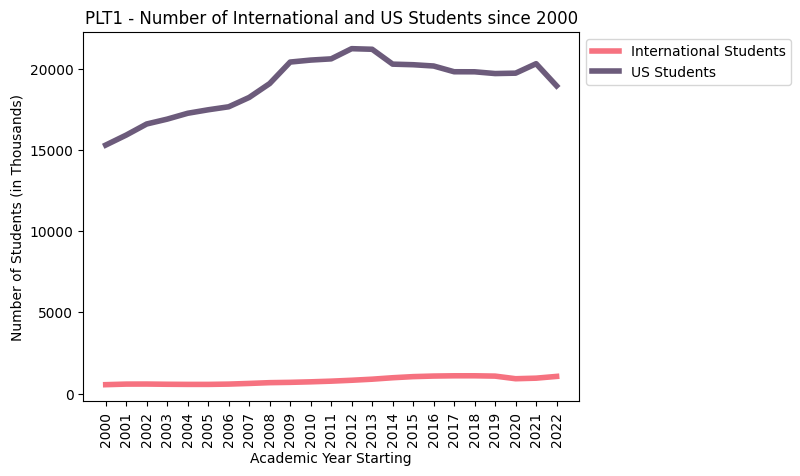

In [0]:
# Collect data
df1 = (
    students_split.select("start_year", "tot_int_students", "tot_us_students")
    .orderBy("start_year")
    .collect()
)

# Extract data
start_years = [row["start_year"] for row in df1]
int_students = [row["tot_int_students"] for row in df1]
us_students = [row["tot_us_students"] for row in df1]

plt.plot(
    start_years,
    int_students,
    label="International Students",
    color="#F67280",
    linewidth=4,
)
plt.plot(start_years, us_students, label="US Students", color="#6C5B7B", linewidth=4)

plt.xlabel("Academic Year Starting")
plt.ylabel("Number of Students (in Thousands)")
plt.xticks(start_years, rotation=90)
plt.title("PLT1 - Number of International and US Students since 2000")
plt.legend(
    bbox_to_anchor=(1, 1)
)  # top-right corner has coordinates (1,1). You need to specify this anchor point otherwise by default the legend will overlap with the figure
plt.show()

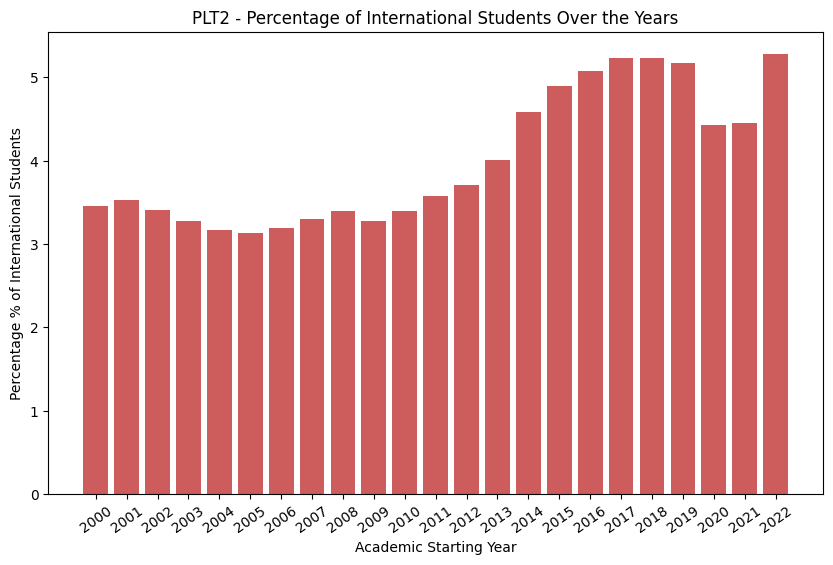

In [0]:
# Collect data
df11 = (
    int_students_percent.select("start_year", "percent_int")
    .orderBy("start_year")
    .collect()
)

# Extract data from DataFrame
years = [row.start_year for row in df11]
per_int = [row.percent_int for row in df11]

# BAR CHART showing the percentage of international students over the years
plt.figure(figsize=(10, 6))
plt.bar(years, per_int, label="Percentage of international students", color="#CD5C5C")

# LABELS
plt.xlabel("Academic Starting Year")
plt.xticks(years, rotation=35)
plt.ylabel("Percentage % of International Students")
plt.title("PLT2 - Percentage of International Students Over the Years")
plt.show()

From PLT1 we can see that the number of national students is far higher than the number of international students. In fact, International students since the 2000 make up less than 5% of the population analysed. 

Despite being a small percentage of the overall student population in the US, the influx of international students grew steadily over the past two decades, showing signs of stagnation only between the 2000 and 2010 when globally countries were recovering from a series of local and global economic crisis (from the dot-com crisis to the global financial crisis of 2008/09).

With financial recovery and the increased access to technology (e.g. 2010 the frist smartphone was introduced by Apple) we see a steep increase of international students in the US in the hopes perhaps to join the western growing tech workforce. 

The growth of international students has only been (temporarily halted) between 2020 and 2021 as the whole word limited international travel due to COVID-19 spread concerns.

Let's look at the data of US students into more detail:

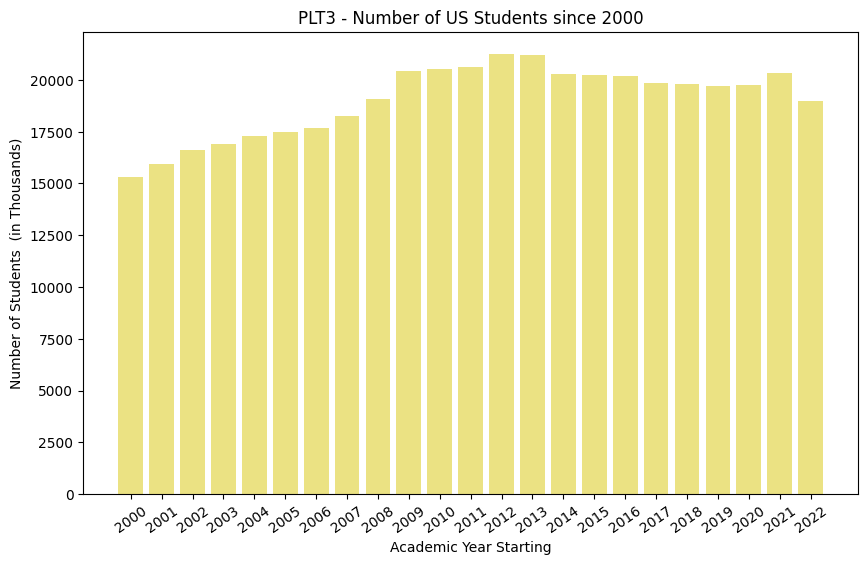

In [0]:
# Collect data
df12 = (
    students_split.select("start_year", "tot_us_students")
    .orderBy("start_year")
    .collect()
)

# Extract data from DataFrame
start_years = [row.start_year for row in df12]
tot_us_students = [row.tot_us_students for row in df12]

# BAR CHART US Students since 2000 (in Thousands)
plt.figure(figsize=(10, 6))
plt.bar(start_years, tot_us_students, color="#EBE283", label="US Students")

# LABELS
plt.xlabel("Academic Year Starting")
plt.ylabel("Number of Students  (in Thousands)")
plt.title("PLT3 - Number of US Students since 2000")
plt.xticks(start_years, rotation=35)
plt.show()

Looking at the numbers in PLT3 we can see that furthering education has become increasingly more important to national US students. Economic downturn doesn't seem to have had a negative effect in the choice of wether to pursue further education or not, in fact between 2000 and 2009 we see a rise in US students numbers, which then is followed by a slow but steady decline up to 2022.

Query 1 leaves us with some new questions about the students trends in the US since 2000:
- What level of education did international students seek in the US?
- What study subject did student pursue and at what level?
- What are the international students origin countries?
- Which is the country with the highest number of human capital flight? 
- How did international students fund their studies over the years? Did the economic crisis impact their choice of funding?

Let's find out: 

## 2. What level of education did international students seek in the US?
Did the majority pursue the undergraduate degree in their home country and then pursue graduate degrees in the US? Find the distribution of students based on academic type.

In [0]:
students_by_type = (
    academic_detail.groupby("academic_type")
    .agg((sum(col("int_students")) / 1000).alias("Students"))
    .orderBy("academic_type")
)

display(students_by_type)

academic_type Students Graduate 7598.197 Non-Degree 1224.109 Optional Practical Training 2472.826 Undergraduate 7684.862

Let's visualise the table:

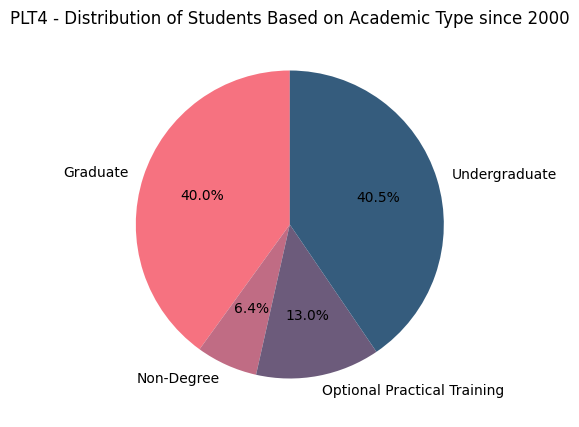

In [0]:
# Collect data
df2 = students_by_type.select("academic_type", "Students").collect()

# Extract data
academic_type = [row["academic_type"] for row in df2]
Students = [row["Students"] for row in df2]

# PIE CHART
plt.figure(figsize=(5, 5))
plt.pie(
    Students,
    labels=academic_type,
    colors=["#F67280", "#C06C84", "#6C5B7B", "#355C7D"],
    autopct="%1.1f%%",
    startangle=90,
)

# TITLE
plt.title("PLT4 - Distribution of Students Based on Academic Type since 2000")
plt.show()

From PLT4 it's clear that over the years the majority of international students moved to the US to pursue an undergraduate or graduate degree, however the split between the two is more or less equal. Did this remain the same over the years? Let's see:

In [0]:
students_by_type = (
    academic_detail.where("start_year >= 2000")
    .groupby("start_year", "academic_type")
    .agg((sum(col("int_students")) / 1000).alias("total_students"))
    .orderBy("start_year", "academic_type")
)

display(students_by_type)

start_year academic_type total_students 2000 Graduate 238.497 2000 Non-Degree 33.884 2000 Optional Practical Training 21.058 2000 Undergraduate 254.429 2001 Graduate 264.748 2001 Non-Degree 34.423 2001 Optional Practical Training 22.745 2001 Undergraduate 261.078 2002 Graduate 267.876 2002 Non-Degree 30.551 2002 Optional Practical Training 27.793 2002 Undergraduate 260.103 2003 Graduate 274.31 2003 Non-Degree 20.659 2003 Optional Practical Training 29.34 2003 Undergraduate 248.2 2004 Graduate 264.41 2004 Non-Degree 28.418 2004 Optional Practical Training 32.999 2004 Undergraduate 239.212 2005 Graduate 259.717 2005 Non-Degree 30.611 2005 Optional Practical Training 38.096 2005 Undergraduate 236.342 2006 Graduate 264.288 2006 Non-Degree 38.986 2006 Optional Practical Training 41.66 2006 Undergraduate 238.05 2007 Graduate 276.842 2007 Non-Degree 46.837 2007 Optional Practical Training 56.766 2007 Undergraduate 243.36 2008 Graduate 283.329 2008 Non-Degree 51.812 2008 Optional Practical Training 66.601 2008 Undergraduate 269.874 2009 Graduate 293.885 2009 Non-Degree 54.803 2009 Optional Practical Training 67.804 2009 Undergraduate 274.431 2010 Graduate 296.574 2010 Non-Degree 59.233 2010 Optional Practical Training 76.031 2010 Undergraduate 291.439 2011 Graduate 300.43 2011 Non-Degree 69.566 2011 Optional Practical Training 85.157 2011 Undergraduate 309.342 2012 Graduate 311.204 2012 Non-Degree 73.528 2012 Optional Practical Training 94.919 2012 Undergraduate 339.993 2013 Graduate 329.854 2013 Non-Degree 79.477 2013 Optional Practical Training 105.997 2013 Undergraduate 370.724 2014 Graduate 362.228 2014 Non-Degree 93.587 2014 Optional Practical Training 120.287 2014 Undergraduate 398.824 2015 Graduate 383.935 2015 Non-Degree 85.093 2015 Optional Practical Training 147.498 2015 Undergraduate 427.313 2016 Graduate 391.124 2016 Non-Degree 72.984 2016 Optional Practical Training 175.695 2016 Undergraduate 439.019 2017 Graduate 382.953 2017 Non-Degree 65.631 2017 Optional Practical Training 203.462 2017 Undergraduate 442.746 2018 Graduate 377.943 2018 Non-Degree 62.341 2018 Optional Practical Training 223.085 2018 Undergraduate 431.93 2019 Graduate 374.435 2019 Non-Degree 58.201 2019 Optional Practical Training 223.539 2019 Undergraduate 419.321 2020 Graduate 329.272 2020 Non-Degree 21.151 2020 Optional Practical Training 203.885 2020 Undergraduate 359.787 2021 Graduate 385.097 2021 Non-Degree 34.131 2021 Optional Practical Training 184.759 2021 Undergraduate 344.532 2022 Graduate 467.027 2022 Non-Degree 43.766 2022 Optional Practical Training 198.793 2022 Undergraduate 347.602

Databricks visualization. Run in Databricks to view.

Whilst still the majority, "Graduate" and "Undergraduate" academic types are no longer the only option considered by international students today: PLT5 shows that since the start of the century, the number of students went to the US to pursue a "Optional Practical Training" has increased by almost 15 percentage points. 

## 3. What study subject did student pursue and at what level?

###3.1 Find out the field of study chosen by international students.

In [0]:
# Field of study chosen by international students.
students_by_field_yoy = (
    field.where(field["start_year"] >= 2000)
    .groupBy("field_of_study", "start_year")
    .agg((sum(col("int_students")) / 1000).alias("total_students"))
    .orderBy("start_year")
)

display(students_by_field_yoy)

field_of_study start_year total_students Legal Studies and Law Enforcement 2000 6.456 Math and Computer Science 2000 67.825 Communications and Journalism 2000 12.219 Business and Management 2000 105.214 Undeclared 2000 35.779 Intensive English 2000 23.011 Social Sciences 2000 38.94 Agriculture 2000 7.2 Physical and Life Sciences 2000 38.396 Health Professions 2000 22.43 Education 2000 14.053 Engineering 2000 83.396 Other Fields of Study 2000 42.606 Fine and Applied Arts 2000 34.22 Humanities 2000 16.123 Intensive English 2001 21.237 Social Sciences 2001 41.241 Legal Studies and Law Enforcement 2001 7.301 Math and Computer Science 2001 76.736 Fine and Applied Arts 2001 33.978 Physical and Life Sciences 2001 41.417 Communications and Journalism 2001 12.595 Education 2001 15.709 Agriculture 2001 7.95 Business and Management 2001 113.495 Other Fields of Study 2001 44.628 Engineering 2001 88.258 Health Professions 2001 24.037 Humanities 2001 18.367 Undeclared 2001 36.048 Fine and Applied Arts 2002 31.018 Communications and Journalism 2002 12.726 Legal Studies and Law Enforcement 2002 7.134 Social Sciences 2002 42.415 Business and Management 2002 113.99 Engineering 2002 96.574 Humanities 2002 19.153 Intensive English 2002 17.62 Undeclared 2002 36.395 Health Professions 2002 28.12 Physical and Life Sciences 2002 43.549 Education 2002 16.004 Agriculture 2002 6.763 Math and Computer Science 2002 71.926 Other Fields of Study 2002 42.934 Education 2003 15.909 Business and Management 2003 107.909 Fine and Applied Arts 2003 31.882 Agriculture 2003 7.292 Physical and Life Sciences 2003 44.607 Communications and Journalism 2003 11.439 Math and Computer Science 2003 67.693 Engineering 2003 95.225 Health Professions 2003 25.749 Legal Studies and Law Enforcement 2003 7.039 Intensive English 2003 15.006 Social Sciences 2003 50.464 Other Fields of Study 2003 46.358 Undeclared 2003 29.313 Humanities 2003 16.622 Engineering 2004 92.97 Health Professions 2004 26.455 Intensive English 2004 16.133 Agriculture 2004 7.519 Business and Management 2004 98.975 Humanities 2004 15.85 Fine and Applied Arts 2004 28.063 Social Sciences 2004 42.263 Math and Computer Science 2004 50.747 Other Fields of Study 2004 46.347 Undeclared 2004 27.982 Physical and Life Sciences 2004 49.499 Legal Studies and Law Enforcement 2004 7.152 Education 2004 15.697 Communications and Journalism 2004 10.955 Intensive English 2005 17.239 Education 2005 16.546 Health Professions 2005 27.704 Humanities 2005 16.48 Other Fields of Study 2005 44.938 Agriculture 2005 7.883 Physical and Life Sciences 2005 50.169 Communications and Journalism 2005 12.09 Legal Studies and Law Enforcement 2005 6.985 Engineering 2005 88.663 Math and Computer Science 2005 45.518 Undeclared 2005 17.888 Fine and Applied Arts 2005 29.508 Business and Management 2005 99.382 Social Sciences 2005 42.235 Legal Studies and Law Enforcement 2006 7.26 Undeclared 2006 19.545 Math and Computer Science 2006 46.019 Fine and Applied Arts 2006 29.588 Other Fields of Study 2006 45.049 Business and Management 2006 102.506 Humanities 2006 16.189 Engineering 2006 89.179 Education 2006 16.825 Agriculture 2006 7.461 Intensive English 2006 22.417 Health Professions 2006 28.723 Communications and Journalism 2006 11.494 Physical and Life Sciences 2006 51.863 Social Sciences 2006 44.983 Legal Studies and Law Enforcement 2007 7.463 Communications and Journalism 2007 12.135 Social Sciences 2007 45.535 Fine and Applied Arts 2007 31.727 Education 2007 17.775 Math and Computer Science 2007 46.313 Intensive English 2007 25.856 Physical and Life Sciences 2007 52.867 Business and Management 2007 110.041 Engineering 2007 96.189 Agriculture 2007 8.945 Humanities 2007 17.46 Health Professions 2007 29.585 Other Fields of Study 2007 45.933 Undeclared 2007 19.215 Social Sciences 2008 52.631 Business and Management 2008 137.495 Undeclared 2008 20.944 Math and Computer Science 2008 56.367 Other Fields of Study 2008 55.303 Legal Studies and Law Enforcemen

Let's visualise the fields of studies favoured by international students:

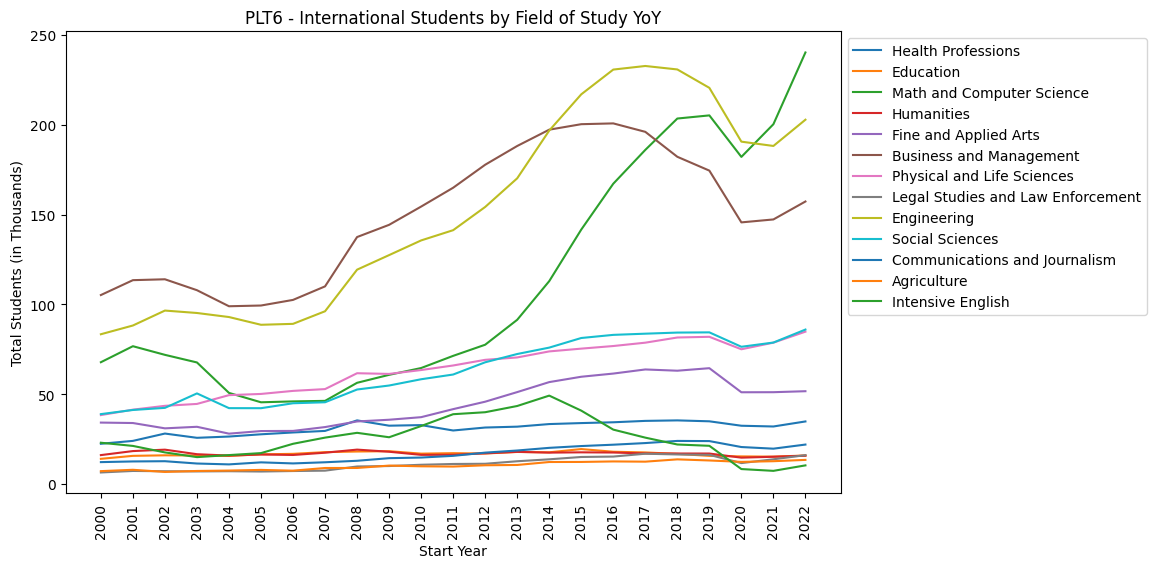

In [0]:
df31 = (
    students_by_field_yoy.select("field_of_study", "total_students", "start_year")
    .orderBy("start_year")
    .collect()
)

field = [row["field_of_study"] for row in df31]
studs = [row["total_students"] for row in df31]
year = [row["start_year"] for row in df31]

# LINE GRAPH
plt.figure(figsize=(10, 6))
# Create a loop so the code iterates through each unique field_of_study
for field_study in set(field):
    # Condition: if statement to exclude some values from result for better readability
    if field_study != "Undeclared" and field_study != "Other Fields of Study": # These could be kept for completeness but as they do not provide much information they have been removed in the visualisation
        # Create lists to store the x-values (start_year) and y-values (total_students) for the field_of_study.
        x = [year[i] for i in range(len(year)) if field[i] == field_study]
        y = [studs[i] for i in range(len(studs)) if field[i] == field_study]
        # Plots the graph using the x and y lists and field_study is used as the line label.
        plt.plot(x, y, label=field_study)

# LABELS
plt.xlabel("Start Year")
plt.xticks(rotation=90)
plt.ylabel("Total Students (in Thousands)")
plt.title("PLT6 - International Students by Field of Study YoY")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

PLT6 highlight the stark raise in interest of "Math and computer science" subjects. In light green in the graph, "Math and computer science" can be seen as third favourite in the 2000 but after a temporary dip in popularity between 2003 and 2007, it quickly raises back. The subject first overtakes "Business and Management" in 2018 and then "Engieneering"in 2021. 

#### 3.1.1 Over the past 23 years what has been the 'popularity' of each field of study?
Popularity is determined by the weighted average of students that have chosen a given subject year on year.

In [0]:
field_of_study = (
    students_by_field_yoy.filter(students_by_field_yoy.start_year >= 2000)
    .groupBy("field_of_study")
    .sum("total_students")
)

# RENAME TABLE SCHEMA ATTRIBUTES - optional but best for clarity
field_of_study = field_of_study.withColumnRenamed(
    "sum(total_students)", "tot_int_students"
)

display(field_of_study)

field_of_study tot_int_students Education 385.7849999999999 Engineering 3488.603 Undeclared 531.059 Other Fields of Study 1427.59 Humanities 390.487 Fine and Applied Arts 1019.9559999999999 Business and Management 3419.866 Intensive English 583.4490000000001 Physical and Life Sciences 1471.369 Math and Computer Science 2533.9790000000003 Agriculture 236.10300000000004 Communications and Journalism 385.98 Legal Studies and Law Enforcement 257.932 Social Sciences 1449.0110000000002 Health Professions 713.4820000000001

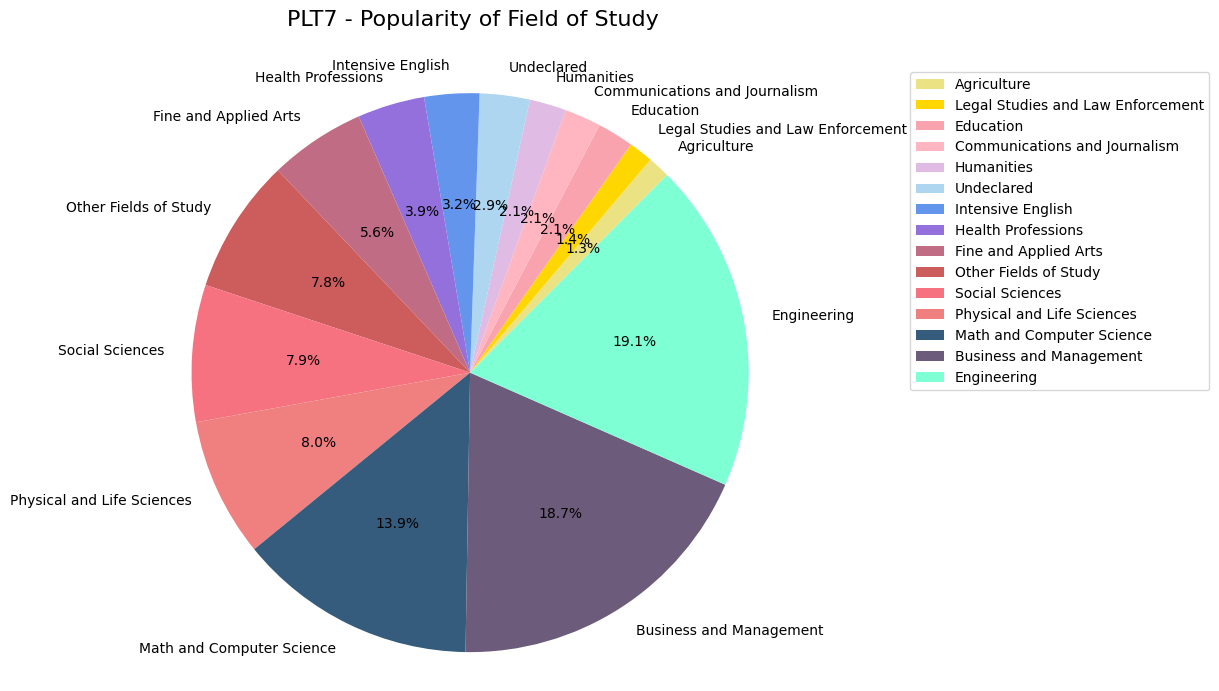

In [0]:
# Collect data
df32 = (
    field_of_study.select("field_of_study", "tot_int_students")
    .orderBy("tot_int_students")
    .collect()
)

# Extract data
fields1 = [row["field_of_study"] for row in df32]
studs1 = [row["tot_int_students"] for row in df32]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    studs1,
    labels=fields1,
    autopct="%1.1f%%",
    colors=[
        "#EBE283",
        "#FFD700",
        "#F9A3AE",
        "#FFB6C1",
        "#E0BBE4",
        "#AED6F1",
        "#6495ED",
        "#9370DB",
        "#C06C84",
        "#CD5C5C",
        "#F67280",
        "#F08080",
        "#355C7D",
        "#6C5B7B",
        "#7FFFD4",
    ],
    startangle=45,
)
plt.axis("equal")

# Labels
plt.title(
    "PLT7 - Popularity of Field of Study", fontsize=16, y=1.05
)  # Move chart title higher up
plt.legend(bbox_to_anchor=(1.7, 1))
plt.show()

PLT7 highlights how over the years Engineering has been overall the most popular subject to study in the US for international students. 

###3.2 Find the distribution of international students based on academic level.

In [0]:
# Find the total number of students for each academic level
students_by_level = (
    academic_detail.where("start_year >= 2000")
    .groupby("start_year", "academic_level")
    .agg((sum(col("int_students")) / 1000).alias("total_students"))
    .orderBy("start_year", "academic_level")
)

# Display the result
display(students_by_level)

start_year academic_level total_students 2000 Associate's 67.493 2000 Bachelor's 186.936 2000 Doctoral 77.211 2000 Graduate, Unspecified 29.361 2000 Intensive English 21.716 2000 Master's 123.92 2000 Optional Practical Training 21.058 2000 Other 12.168 2000 Professional 8.005 2001 Associate's 67.667 2001 Bachelor's 193.411 2001 Doctoral 81.824 2001 Graduate, Unspecified 36.185 2001 Intensive English 20.41 2001 Master's 138.791 2001 Optional Practical Training 22.745 2001 Other 14.013 2001 Professional 7.948 2002 Associate's 72.494 2002 Bachelor's 187.609 2002 Doctoral 92.203 2002 Graduate, Unspecified 29.243 2002 Intensive English 16.856 2002 Master's 138.634 2002 Optional Practical Training 27.793 2002 Other 13.695 2002 Professional 7.796 2003 Associate's 69.541 2003 Bachelor's 178.659 2003 Doctoral 100.092 2003 Graduate, Unspecified 23.735 2003 Intensive English 10.224 2003 Master's 142.271 2003 Optional Practical Training 29.34 2003 Other 10.435 2003 Professional 8.212 2004 Associate's 65.667 2004 Bachelor's 173.545 2004 Doctoral 102.084 2004 Graduate, Unspecified 33.128 2004 Intensive English 12.896 2004 Master's 121.523 2004 Optional Practical Training 32.999 2004 Other 15.522 2004 Professional 7.675 2005 Associate's 63.598 2005 Bachelor's 172.744 2005 Doctoral 107.993 2005 Graduate, Unspecified 27.827 2005 Intensive English 15.217 2005 Master's 115.434 2005 Optional Practical Training 38.096 2005 Other 15.394 2005 Professional 8.463 2006 Associate's 67.855 2006 Bachelor's 170.195 2006 Doctoral 108.033 2006 Graduate, Unspecified 26.455 2006 Intensive English 19.819 2006 Master's 122.385 2006 Optional Practical Training 41.66 2006 Other 19.167 2006 Professional 7.415 2007 Associate's 65.378 2007 Bachelor's 177.982 2007 Doctoral 108.976 2007 Graduate, Unspecified 24.696 2007 Intensive English 24.468 2007 Master's 133.698 2007 Optional Practical Training 56.766 2007 Other 22.369 2007 Professional 9.472 2008 Associate's 74.048 2008 Bachelor's 195.826 2008 Doctoral 108.29 2008 Graduate, Unspecified 21.35 2008 Intensive English 26.8 2008 Master's 143.709 2008 Optional Practical Training 66.601 2008 Other 25.012 2008 Professional 9.98 2009 Associate's 68.562 2009 Bachelor's 205.869 2009 Doctoral 116.254 2009 Graduate, Unspecified 15.684 2009 Intensive English 26.059 2009 Master's 151.252 2009 Optional Practical Training 67.804 2009 Other 28.744 2009 Professional 10.695 2010 Associate's 71.586 2010 Bachelor's 219.853 2010 Doctoral 119.641 2010 Graduate, Unspecified 11.025 2010 Intensive English 29.603 2010 Master's 154.854 2010 Optional Practical Training 76.031 2010 Other 29.63 2010 Professional 11.054 2011 Associate's 64.516 2011 Bachelor's 244.826 2011 Doctoral 117.564 2011 Graduate, Unspecified 16.977 2011 Intensive English 35.108 2011 Master's 153.735 2011 Optional Practical Training 85.157 2011 Other 34.458 2011 Professional 12.154 2012 Associate's 68.05 2012 Bachelor's 271.943 2012 Doctoral 117.779 2012 Graduate, Unspecified 15.429 2012 Intensive English 37.213 2012 Master's 165.978 2012 Optional Practical Training 94.919 2012 Other 36.315 2012 Professional 12.018 2013 Associate's 69.58 2013 Bachelor's 301.144 2013 Doctoral 114.79 2013 Graduate, Unspecified 22.311 2013 Intensive English 41.723 2013 Master's 181.371 2013 Optional Practical Training 105.997 2013 Other 37.754 2013 Professional 11.382 2014 Associate's 69.523 2014 Bachelor's 329.301 2014 Doctoral 118.104 2014 Graduate, Unspecified 25.551 2014 Intensive English 46.17 2014 Master's 208.355 2014 Optional Practical Training 120.287 2014 Other 47.417 2014 Professional 10.218 2015 Associate's 78.297 2015 Bachelor's 349.016 2015 Doctoral 122.655 2015 Graduate, Unspecified 15.075 2015 Intensive English 39.444 2015 Master's 233.463 2015 Optional Practical Training 147.498 2015 Other 45.649 2015 Professional 12.742 2016 Associate's 76.353 2016 Bachelor's 362.666 2016 Doctoral 124.705 2016 Graduate, Unspecified 16.602 2016 Intensive English 30.331 2016 Master's 237.679 20

Let's visualise the academic level split:

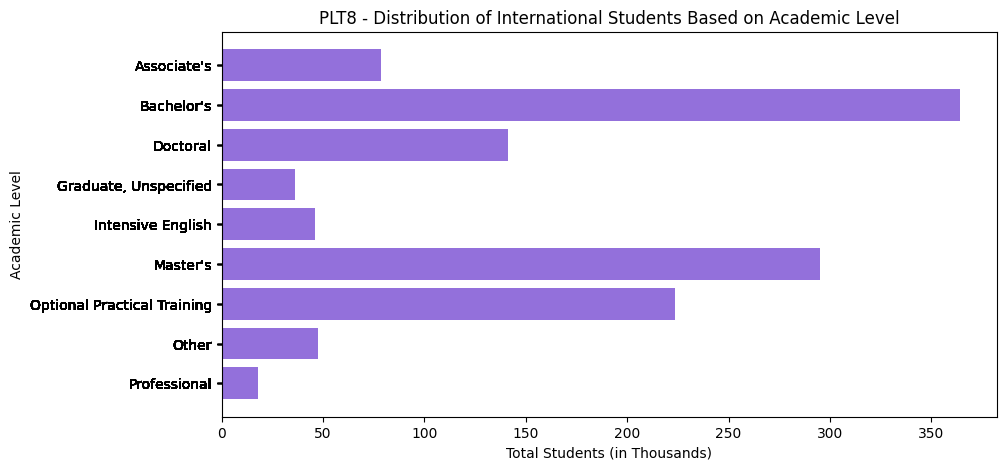

In [0]:
df32 = (
    students_by_level.select("academic_level", "total_students")
    .orderBy("academic_level", ascending=False)
    .collect()
)

# Extract data
academic_level = [row["academic_level"] for row in df32]
total_students1 = [row["total_students"] for row in df32]

# HORIZONTAL BAR CHART
plt.figure(figsize=(10, 5))

plt.barh(
    academic_level,
    total_students1,
    color= "#9370DB",
    label="Academic Level",
)

# LABELS
plt.ylabel("Academic Level")
plt.xlabel("Total Students (in Thousands)")
plt.title("PLT8 - Distribution of International Students Based on Academic Level")
plt.yticks(academic_level)

plt.show()

## 4. What are the international students origin regions and countries?

In [0]:
students_by_origin = origin.select(
    "start_year", "region", "country", "academic_type"
).orderBy("start_year")

display(students_by_origin)

start_year region country academic_type 2000 Africa, Subsaharan Africa, Subsaharan, Unspecified Graduate 2000 Africa, Subsaharan Africa, Subsaharan, Unspecified Undergraduate 2000 Asia Asia, Unspecified Other 2000 Caribbean Anguilla Graduate 2000 Caribbean Anguilla Other 2000 Caribbean Anguilla Undergraduate 2000 Caribbean Antigua and Barbuda Graduate 2000 Caribbean Antigua and Barbuda Other 2000 Caribbean Antigua and Barbuda Undergraduate 2000 Caribbean Aruba Graduate 2000 Caribbean Aruba Other 2000 Caribbean Aruba Undergraduate 2000 Caribbean Bahamas Graduate 2000 Caribbean Bahamas Other 2000 Caribbean Bahamas Undergraduate 2000 Caribbean Barbados Graduate 2000 Caribbean Barbados Other 2000 Caribbean Barbados Undergraduate 2000 Caribbean Bermuda Graduate 2000 Caribbean Bermuda Other 2000 Caribbean Bermuda Undergraduate 2000 Caribbean British Virgin Islands Graduate 2000 Caribbean British Virgin Islands Other 2000 Caribbean British Virgin Islands Undergraduate 2000 Caribbean Caribbean, Unspecified Graduate 2000 Caribbean Caribbean, Unspecified Undergraduate 2000 Caribbean Cayman Islands Graduate 2000 Caribbean Cayman Islands Other 2000 Caribbean Cayman Islands Undergraduate 2000 Caribbean Cuba Graduate 2000 Caribbean Cuba Other 2000 Caribbean Cuba Undergraduate 2000 Caribbean Dominica Graduate 2000 Caribbean Dominica Other 2000 Caribbean Dominica Undergraduate 2000 Caribbean Dominican Republic Graduate 2000 Caribbean Dominican Republic Other 2000 Caribbean Dominican Republic Undergraduate 2000 Caribbean Grenada Graduate 2000 Caribbean Grenada Other 2000 Caribbean Grenada Undergraduate 2000 Caribbean Guadeloupe Graduate 2000 Caribbean Guadeloupe Undergraduate 2000 Caribbean Haiti Graduate 2000 Caribbean Haiti Other 2000 Caribbean Haiti Undergraduate 2000 Caribbean Jamaica Graduate 2000 Caribbean Jamaica Other 2000 Caribbean Jamaica Undergraduate 2000 Caribbean Martinique Undergraduate 2000 Caribbean Montserrat Graduate 2000 Caribbean Montserrat Undergraduate 2000 Caribbean Netherlands Antilles Graduate 2000 Caribbean Netherlands Antilles Other 2000 Caribbean Netherlands Antilles Undergraduate 2000 Caribbean St. Kitts and Nevis Graduate 2000 Caribbean St. Kitts and Nevis Other 2000 Caribbean St. Kitts and Nevis Undergraduate 2000 Caribbean St. Lucia Graduate 2000 Caribbean St. Lucia Other 2000 Caribbean St. Lucia Undergraduate 2000 Caribbean St. Vincent and the Grenadines Graduate 2000 Caribbean St. Vincent and the Grenadines Other 2000 Caribbean St. Vincent and the Grenadines Undergraduate 2000 Caribbean Trinidad and Tobago Graduate 2000 Caribbean Trinidad and Tobago Other 2000 Caribbean Trinidad and Tobago Undergraduate 2000 Caribbean Turks and Caicos Graduate 2000 Caribbean Turks and Caicos Undergraduate 2000 Central Africa Cameroon Graduate 2000 Central Africa Cameroon Other 2000 Central Africa Cameroon Undergraduate 2000 Central Africa Central Africa, Unspecified Undergraduate 2000 Central Africa Central African Republic Graduate 2000 Central Africa Central African Republic Other 2000 Central Africa Central African Republic Undergraduate 2000 Central Africa Chad Graduate 2000 Central Africa Chad Other 2000 Central Africa Chad Undergraduate 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Graduate 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Other 2000 Central Africa Congo, Dem. Rep. of the (Kinshasa) Undergraduate 2000 Central Africa Equatorial Guinea Graduate 2000 Central Africa Equatorial Guinea Other 2000 Central Africa Equatorial Guinea Undergraduate 2000 Central Africa Gabon Graduate 2000 Central Africa Gabon Other 2000 Central Africa Gabon Undergraduate 2000 Central Africa São Tomé and Príncipe Graduate 2000 Central Africa São Tomé and Príncipe Undergraduate 2000 East Africa Burundi Graduate 2000 East Africa Burundi Undergraduate 2000 East Africa Djibouti Graduate 2000 East Africa Djibouti Other 2000 East Africa Djibouti Undergraduate 2000 East Africa East Africa, Unspecified Graduate 2000 East Africa

### 4.1 Find the distribution of international students based on origin regions.

In [0]:
# Calculate the total international students per start year and region
students_by_origin = (
    origin.groupBy("start_year", "region")
    .agg((sum(col("int_students")) / 1000).alias("tot_int_students"))
)

# Calculate the total students per year
total_students = (
    students_by_origin.groupBy("start_year")
    .agg(sum(col("tot_int_students")).alias("total_students_year"))
)

# Calculate the percentage of international students
students_by_origin = (
    students_by_origin.join(total_students, on="start_year")
    .withColumn("percentage_by_year", (col("tot_int_students") / col("total_students_year")) * 100)
    .orderBy("start_year", "percentage_by_year", ascending=False)
)

display(students_by_origin)

start_year region tot_int_students total_students_year percentage_by_year 2022 East Asia 378.979 1057.188 35.84783406546423 2022 South and Central Asia 316.446 1057.188 29.932802869499085 2022 Europe 89.906 1057.188 8.504258466800607 2022 Southeast Asia 52.74 1057.188 4.988705887694525 2022 South America 46.475 1057.188 4.39609605860074 2022 Middle East 45.014 1057.188 4.25789925727496 2022 West Africa 28.111 1057.188 2.659035100663269 2022 North America 27.876 1057.188 2.6368063201625445 2022 Mexico and Central America 23.778 1057.188 2.2491742244520365 2022 Caribbean 11.692 1057.188 1.1059527728275387 2022 East Africa 11.312 1057.188 1.0700083618050904 2022 Southern Africa 7.282 1057.188 0.6888084238564948 2022 North Africa 7.281 1057.188 0.6887138333011724 2022 Oceania 6.782 1057.188 0.6415131461953786 2022 Central Africa 3.494 1057.188 0.33049940029587926 2022 Stateless 0.02 1057.188 0.0018918111064446434 2021 East Asia 372.378 948.5189999999999 39.25888674871036 2021 South and Central Asia 237.5 948.5189999999999 25.03903453699926 2021 Europe 83.24 948.5189999999999 8.77578625204134 2021 Southeast Asia 48.791 948.5189999999999 5.143913827767288 2021 Middle East 46.314 948.5189999999999 4.882769875985616 2021 South America 43.655 948.5189999999999 4.6024381166850645 2021 North America 27.013 948.5189999999999 2.8479134313598364 2021 Mexico and Central America 23.525 948.5189999999999 2.480182263085927 2021 West Africa 22.974 948.5189999999999 2.4220917029600884 2021 Caribbean 10.789 948.5189999999999 1.1374574468197265 2021 East Africa 10.157 948.5189999999999 1.0708272580728484 2021 North Africa 6.79 948.5189999999999 0.7158528189735789 2021 Southern Africa 6.516 948.5189999999999 0.6869656801814198 2021 Oceania 5.994 948.5189999999999 0.6319325179569414 2021 Central Africa 2.871 948.5189999999999 0.30268239223463106 2021 Stateless 0.012 948.5189999999999 0.0012651301660799629 2020 East Asia 395.808 914.095 43.300532220392846 2020 South and Central Asia 201.26 914.095 22.0174051931145 2020 Europe 67.979 914.095 7.436754385485098 2020 Middle East 51.282 914.095 5.61013898992993 2020 Southeast Asia 48.554 914.095 5.311701737784366 2020 South America 40.451 914.095 4.42525120474349 2020 North America 25.143 914.095 2.7505893807536417 2020 Mexico and Central America 21.224 914.095 2.3218593253436457 2020 West Africa 20.808 914.095 2.276349832347841 2020 Caribbean 11.175 914.095 1.2225206351637412 2020 East Africa 9.319 914.095 1.0194782817978438 2020 North Africa 6.282 914.095 0.6872371033645299 2020 Southern Africa 6.035 914.095 0.660215841898271 2020 Oceania 5.864 914.095 0.6415088147293224 2020 Central Africa 2.899 914.095 0.3171442793145132 2020 Stateless 0.012 914.095 0.00131277383641744 2019 East Asia 472.339 1075.496 43.91824795257258 2019 South and Central Asia 229.95 1075.496 21.380832657676084 2019 Europe 89.784 1075.496 8.348148203247616 2019 Middle East 65.343 1075.496 6.075615343990122 2019 Southeast Asia 55.725 1075.496 5.181330288536637 2019 South America 45.249 1075.496 4.207268088398283 2019 North America 25.992 1075.496 2.4167453900339937 2019 Mexico and Central America 23.11 1075.496 2.148776006605324 2019 West Africa 22.151 1075.496 2.0596078460542855 2019 Caribbean 11.845 1075.496 1.1013523062847281 2019 East Africa 9.989 1075.496 0.9287807671995061 2019 Oceania 7.473 1075.496 0.6948421937413063 2019 North Africa 6.982 1075.496 0.6491888393820153 2019 Southern Africa 6.486 1075.496 0.6030705832471714 2019 Central Africa 3.071 1075.496 0.28554267054456733 2019 Stateless 0.007 1075.496 6.508624857740056E-4 2018 East Asia 472.085 1095.2990000000002 43.101016252183186 2018 South and Central Asia 238.621 1095.2990000000002 21.785923295830635 2018 Europe 90.996 1095.2990000000002 8.307868445054728 2018 Middle East 74.165 1095.2990000000002 6.771210418342388 2018 Southeast Asia 57.554 1095.2990000000002 5.254638231204447 2018 South America 45.899 1095.2990000000002 4.190545230115247 2018 North America 26.122 109

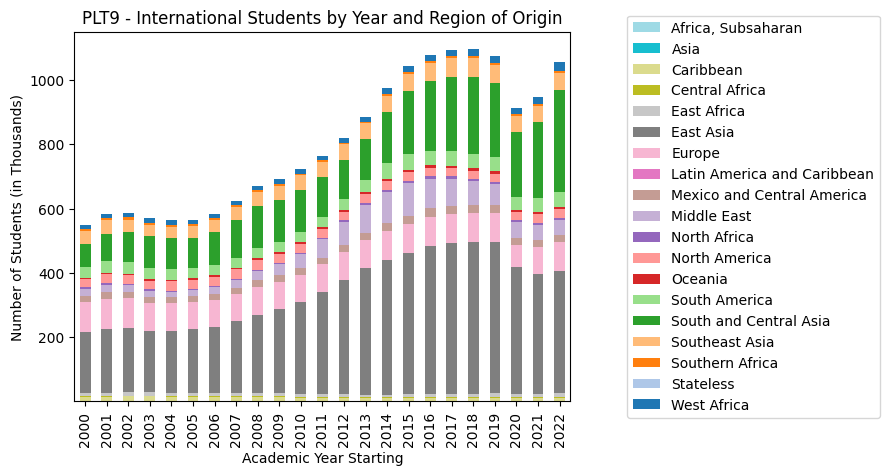

In [0]:
df41 = students_by_origin.toPandas()

pivot_df41 = df41.pivot(index="start_year", columns="region", values="tot_int_students")

pivot_df41.plot(
    kind="bar",
    stacked=True,
    color=plt.cm.tab20_r(np.linspace(0, 1, len(pivot_df41.columns))),
)

plt.xlabel("Academic Year Starting")
plt.ylabel("Number of Students (in Thousands)")
plt.title("PLT9 - International Students by Year and Region of Origin")

plt.legend(
    bbox_to_anchor=(1.1, 0.5), loc="center left"
)  # move the legends to the center left

plt.show()

Graph PLT9 illustrates a significant trend: since the year 2000, the majority of students arriving in the US have hailed from East Asia, with their numbers steadily increasing alongside the total student population. However, this dominance has been waning since 2020. Conversely, South and Central Asia have witnessed a surge in student representation within the United States in recent years.



### 4.2 Find the top countries contributing to international student population in the US

#### 4.2.1 Where did the majority of international students in the US come from and what changed over the years?

In [0]:
# Group by origin country and year, and sum the number of students in each group
students_by_country = (
    origin.where(origin["start_year"] >= 2000)
    .groupBy("start_year", "country")
    .agg((sum(col("int_students")) / 1000).alias("tot_int_students"))
    .orderBy("tot_int_students", ascending=False)
)

display(students_by_country)

start_year country tot_int_students 2019 China 372.532 2018 China 369.548 2017 China 363.341 2016 China 350.755 2015 China 328.547 2020 China 317.299 2014 China 304.04 2021 China 290.086 2022 China 289.526 2013 China 274.439 2022 India 268.923 2012 China 235.597 2018 India 202.014 2021 India 199.182 2017 India 196.271 2011 China 194.029 2019 India 193.124 2016 India 186.267 2020 India 167.582 2015 India 165.918 2010 China 157.558 2014 India 132.888 2009 China 127.628 2009 India 104.897 2010 India 103.895 2008 India 103.26 2013 India 102.673 2011 India 100.27 2008 China 98.235 2012 India 96.754 2007 India 94.563 2006 India 83.833 2007 China 81.127 2004 India 80.466 2003 India 79.736 2005 India 76.503 2008 South Korea 75.065 2002 India 74.602 2010 South Korea 73.351 2011 South Korea 72.295 2009 South Korea 72.153 2012 South Korea 70.627 2007 South Korea 69.124 2013 South Korea 68.047 2006 China 67.723 2001 India 66.836 2002 China 64.757 2014 South Korea 63.71 2001 China 63.211 2005 China 62.582 2004 China 62.523 2006 South Korea 62.392 2003 China 61.765 2015 Saudi Arabia 61.287 2015 South Korea 61.007 2014 Saudi Arabia 59.945 2000 China 59.939 2005 South Korea 59.022 2016 South Korea 58.663 2000 India 54.664 2017 South Korea 54.555 2013 Saudi Arabia 53.919 2004 South Korea 53.358 2016 Saudi Arabia 52.611 2003 South Korea 52.484 2018 South Korea 52.25 2002 South Korea 51.518 2019 South Korea 49.809 2001 South Korea 49.047 2001 Japan 46.81 2000 Japan 46.496 2002 Japan 45.96 2000 South Korea 45.685 2012 Saudi Arabia 44.566 2017 Saudi Arabia 44.432 2022 South Korea 43.847 2004 Japan 42.215 2003 Japan 40.835 2021 South Korea 40.755 2020 South Korea 39.491 2005 Japan 38.712 2018 Saudi Arabia 37.08 2006 Japan 35.282 2011 Saudi Arabia 34.139 2007 Japan 33.974 2019 Saudi Arabia 30.957 2008 Canada 29.697 2008 Japan 29.264 2006 Taiwan 29.094 2007 Canada 29.051 2007 Taiwan 29.001 2001 Taiwan 28.931 2000 Taiwan 28.566 2013 Canada 28.304 2006 Canada 28.28 2005 Canada 28.202 2009 Canada 28.145 2004 Canada 28.14 2008 Taiwan 28.065 2002 Taiwan 28.017 2022 Canada 27.876 2005 Taiwan 27.876 2010 Canada 27.546 2012 Canada 27.357 2014 Canada 27.24 2016 Canada 27.065 2003 Canada 27.017 2021 Canada 27.013 2015 Canada 26.973 2011 Canada 26.821 2009 Taiwan 26.685 2001 Canada 26.515 2002 Canada 26.513 2003 Taiwan 26.178 2018 Canada 26.122 2019 Canada 25.992 2004 Taiwan 25.914 2017 Canada 25.909 2000 Canada 25.279 2020 Canada 25.143 2009 Japan 24.842 2010 Taiwan 24.818 2018 Vietnam 24.392 2017 Vietnam 24.325 2019 Vietnam 23.777 2019 Taiwan 23.724 2014 Brazil 23.675 2018 Taiwan 23.369 2011 Taiwan 23.25 2010 Saudi Arabia 22.704 2017 Taiwan 22.454 2016 Vietnam 22.438 2020 Saudi Arabia 21.933 2022 Vietnam 21.9 2012 Taiwan 21.867 2022 Taiwan 21.834 2020 Vietnam 21.631 2016 Taiwan 21.516 2015 Vietnam 21.403 2010 Japan 21.29 2013 Taiwan 21.266 2015 Taiwan 21.127 2014 Taiwan 20.993 2021 Vietnam 20.713 2021 Taiwan 20.487 2011 Japan 19.966 2020 Taiwan 19.673 2012 Japan 19.568 2015 Brazil 19.37 2013 Japan 19.334 2014 Japan 19.064 2015 Japan 19.06 2016 Japan 18.78 2017 Japan 18.753 2014 Vietnam 18.722 2021 Saudi Arabia 18.206 2018 Japan 18.105 2022 Nigeria 17.64 2019 Japan 17.554 2014 Mexico 17.052 2016 Mexico 16.835 2015 Mexico 16.733 2019 Brazil 16.671 2013 Vietnam 16.579 2012 Vietnam 16.098 2018 Brazil 16.059 2022 Japan 16.054 2022 Brazil 16.025 2022 Saudi Arabia 15.989 2009 Saudi Arabia 15.81 2011 Vietnam 15.572 2017 Mexico 15.468 2018 Mexico 15.229 2022 Nepal 15.09 2021 Brazil 14.897 2010 Vietnam 14.888 2008 Mexico 14.85 2007 Mexico 14.837 2013 Mexico 14.779 2017 Brazil 14.62 2022 Mexico 14.541 2021 Mexico 14.5 2021 Nigeria 14.438 2019 Mexico 14.348 2012 Mexico 14.199 2020 Brazil 14.0 2005 Mexico 13.931 2011 Mexico 13.893 2006 Mexico 13.826 2019 Nigeria 13.762 2010 Mexico 13.713 2022 Bangladesh 13.563 2009 Mexico 13.45 2021 Japan 13.449 2018 Nigeria 13.423 2003 Mexico 13.329 2013 Brazil 13.286 2017 Nepal 13.27 2008 Turkey 13.263 2018 Nepal 13.229 2009 Vietnam 13.

Databricks visualization. Run in Databricks to view.

#### 4.2.2 What about the the 2022/23 academic year specifically?

In [0]:
# Group by origin country and year, and sum the number of students in each group
students_by_country = (
    origin.where(origin["start_year"] >= 2022)
    .groupBy("start_year", "country")
    .agg((sum(col("int_students")) / 1000).alias("tot_int_students"))
    .orderBy("tot_int_students", ascending=False)
)

display(students_by_country)

start_year country tot_int_students 2022 China 289.526 2022 India 268.923 2022 South Korea 43.847 2022 Canada 27.876 2022 Vietnam 21.9 2022 Taiwan 21.834 2022 Nigeria 17.64 2022 Japan 16.054 2022 Brazil 16.025 2022 Saudi Arabia 15.989 2022 Nepal 15.09 2022 Mexico 14.541 2022 Bangladesh 13.563 2022 Iran 10.812 2022 United Kingdom 10.659 2022 Pakistan 10.164 2022 Germany 9.751 2022 Colombia 9.096 2022 Turkey 8.657 2022 France 8.552 2022 Spain 8.548 2022 Indonesia 8.467 2022 Ghana 6.468 2022 Italy 6.274 2022 Hong Kong 5.867 2022 Kuwait 5.427 2022 Thailand 5.376 2022 Peru 5.17 2022 Malaysia 4.973 2022 Russia 4.913 2022 Australia 4.504 2022 Singapore 4.484 2022 Egypt 4.247 2022 Venezuela 4.21 2022 Kenya 4.059 2022 Philippines 3.818 2022 Sri Lanka 3.106 2022 Ecuador 3.09 2022 Chile 3.007 2022 Ethiopia 3.006 2022 Argentina 2.979 2022 Jamaica 2.928 2022 Netherlands 2.751 2022 Sweden 2.732 2022 South Africa 2.713 2022 Jordan 2.608 2022 Bahamas 2.606 2022 Greece 2.539 2022 Burma/Myanmar 2.483 2022 Kazakhstan 2.44 2022 Honduras 2.227 2022 Lebanon 2.097 2022 Panama 2.087 2022 Oman 2.077 2022 Ukraine 2.072 2022 Israel 2.019 2022 Norway 1.926 2022 Zimbabwe 1.789 2022 Congo, Dem. Rep. of the (Kinshasa) 1.66 2022 New Zealand 1.651 2022 Morocco 1.603 2022 Poland 1.585 2022 Dominican Republic 1.514 2022 United Arab Emirates 1.502 2022 Mongolia 1.488 2022 Ireland 1.441 2022 Switzerland 1.434 2022 Denmark 1.393 2022 Rwanda 1.372 2022 Costa Rica 1.357 2022 Bolivia 1.332 2022 El Salvador 1.309 2022 Guatemala 1.289 2022 Trinidad and Tobago 1.248 2022 Uzbekistan 1.089 2022 Uganda 1.088 2022 Albania 1.087 2022 Cameroon 1.086 2022 Côte d’Ivoire 1.072 2022 Cambodia 1.06 2022 Austria 1.054 2022 Portugal 1.045 2022 Belgium 1.044 2022 Haiti 1.015 2022 Tanzania 0.904 2022 Azerbaijan 0.901 2022 Romania 0.876 2022 Serbia 0.863 2022 Georgia 0.832 2022 Czechia/Czech Republic 0.787 2022 Paraguay 0.732 2022 Hungary 0.712 2022 Kyrgyzstan 0.705 2022 Afghanistan 0.682 2022 Tunisia 0.68 2022 Nicaragua 0.598 2022 Zambia 0.555 2022 Angola 0.553 2022 Bulgaria 0.546 2022 Iraq 0.544 2022 Finland 0.517 2022 Senegal 0.49 2022 Dominica 0.459 2022 Armenia 0.457 2022 Palestinian Territories 0.457 2022 Libya 0.449 2022 Cyprus 0.413 2022 Croatia 0.408 2022 Qatar 0.404 2022 Syria 0.402 2022 Uruguay 0.398 2022 Belarus 0.382 2022 Sudan 0.381 2022 Guyana 0.38 2022 Malawi 0.373 2022 Burkina Faso 0.372 2022 Bahrain 0.371 2022 Belize 0.37 2022 Iceland 0.367 2022 Macau 0.36 2022 Niger 0.332 2022 Lithuania 0.323 2022 Yemen 0.305 2022 Algeria 0.302 2022 Turkmenistan 0.299 2022 Slovakia 0.296 2022 Mauritius 0.292 2022 Barbados 0.287 2022 Gambia, The 0.286 2022 Sierra Leone 0.28 2022 Liberia 0.276 2022 Botswana 0.256 2022 Mali 0.254 2022 Latvia 0.251 2022 Benin 0.246 2022 Gabon 0.236 2022 Bosnia and Herzegovina 0.236 2022 Equatorial Guinea 0.234 2022 Bermuda 0.228 2022 Madagascar 0.226 2022 Slovenia 0.212 2022 North Macedonia 0.209 2022 St. Lucia 0.201 2022 Congo, Republic of the (Brazzaville) 0.199 2022 Togo 0.198 2022 Estonia 0.197 2022 Burundi 0.194 2022 Bhutan 0.188 2022 St. Kitts and Nevis 0.186 2022 Eswatini 0.181 2022 Tajikistan 0.17 2022 Antigua and Barbuda 0.168 2022 Kosovo 0.16 2022 Moldova 0.151 2022 Tonga 0.147 2022 Mozambique 0.147 2022 Cayman Islands 0.145 2022 Fiji 0.134 2022 Montenegro 0.132 2022 Grenada 0.129 2022 Somalia 0.12 2022 Cuba 0.113 2022 Laos 0.107 2022 Papua New Guinea 0.104 2022 Guinea 0.096 2022 Namibia 0.094 2022 St. Vincent and the Grenadines 0.093 2022 Sint Maarten 0.09 2022 Luxembourg 0.089 2022 South Sudan 0.087 2022 British Virgin Islands 0.082 2022 Malta 0.082 2022 Eritrea 0.073 2022 Lesotho 0.07 2022 Chad 0.067 2022 Samoa 0.066 2022 Aruba 0.058 2022 French Polynesia 0.056 2022 Curacao 0.054 2022 Cabo Verde 0.047 2022 Suriname 0.043 2022 Kiribati 0.042 2022 Mauritania 0.041 2022 Brunei 0.041 2022 Turks and Caicos 0.036 2022 Micronesia, Federate States of 0.033 2022 TimorLeste 0.031 2022 Maldives 0.027 2022 Guadeloupe 0.025 2022 Comoros 0.023 2022 Andorra

Databricks visualization. Run in Databricks to view.

## 5. What do the international poulation demographics look like?

> NOTE: There is no availabe data prior to 2007

In [0]:
demographics = (
    status.where(status["start_year"] >= 2000)
    .select("start_year", "female", "male", "single", "married")
    .orderBy("start_year", ascending=False)
)

display(demographics)

start_year female male single married 2022 473620 583568 966270 90918 2021 428731 519788 861255 87264 2020 407686 506409 827256 86839 2019 477520 597976 987305 88191 2018 480836 614463 1002199 93100 2017 477329 617463 999545 95247 2016 470366 608456 970940 107882 2015 451982 591857 950937 92902 2014 426043 548883 886208 88718 2013 390749 495303 806307 79745 2012 363922 455722 744237 75407 2011 338671 425824 690339 74156 2010 322582 400695 653842 69435 2009 309534 381389 615612 75311 2008 304242 367374 591694 79922 2007 278841 344964 543958 79847

### 5.1 Find the distribution of international students based on gender.

In [0]:
# Add female percentage
demographics = demographics.withColumn(
    "female_", (col("female") / (col("female") + col("male")) * 100)
)

# Add male percentage
demographics = demographics.withColumn(
    "male_", (col("male") / (col("female") + col("male")) * 100)
)

# Define the window specification
windowSpec = Window.orderBy("start_year")

# Add increase in female percentage by year
demographics = demographics.withColumn(
    "increase female",
    (col("female") - lag(col("female")).over(windowSpec))
    / lag(col("female")).over(windowSpec)
    * 100,
)

# Add increase in male percentage by year
demographics = demographics.withColumn(
    "increase male",
    (col("male") - lag(col("male")).over(windowSpec))
    / lag(col("male")).over(windowSpec)
    * 100,
)

# Select columns to display
demographics = demographics.select(
    "start_year",
    "female",
    "female_",
    "increase female",
    "male",
    "male_",
    "increase male",
)

display(demographics)

start_year female female_ increase female male male_ increase male 2007 278841 44.700026450573496 null 344964 55.299973549426504 null 2008 304242 45.29999285305889 9.109492506482189 367374 54.70000714694111 6.496330051831495 2009 309534 44.800071788028475 1.7394048159031297 381389 55.199928211971525 3.814913412489725 2010 322582 44.60006332290395 4.215368909392829 400695 55.39993667709605 5.062023288558401 2011 338671 44.299962720488686 4.987569052209981 425824 55.700037279511314 6.271353523253348 2012 363922 44.40000780826798 7.45590853660337 455722 55.599992191732014 7.0212106410160064 2013 390749 44.10000767449315 7.371634581036596 495303 55.89999232550685 8.685338868871813 2014 426043 43.70003466929798 9.032396755973783 548883 56.299965330702015 10.817620729129441 2015 451982 43.29997250533847 6.088352584128832 591857 56.70002749466153 7.82935525421629 2016 470366 43.59996366407062 4.067418614015603 608456 56.40003633592937 2.8045625885982592 2017 477329 43.59997150143589 1.4803365889541336 617463 56.40002849856411 1.4803042455000854 2018 480836 43.899976170890326 0.7347133737945946 614463 56.10002382910968 -0.4858590717176575 2019 477520 44.39997917240046 -0.6896322238767479 597976 55.60002082759955 -2.6831558612967745 2020 407686 44.59995952280671 -14.624308929468924 506409 55.40004047719329 -15.312821919274352 2021 428731 45.2000434361357 5.162060997924874 519788 54.79995656386429 2.6419356685998867 2022 473620 44.799978811715604 10.470201594939484 583568 55.20002118828439 12.270387157841274

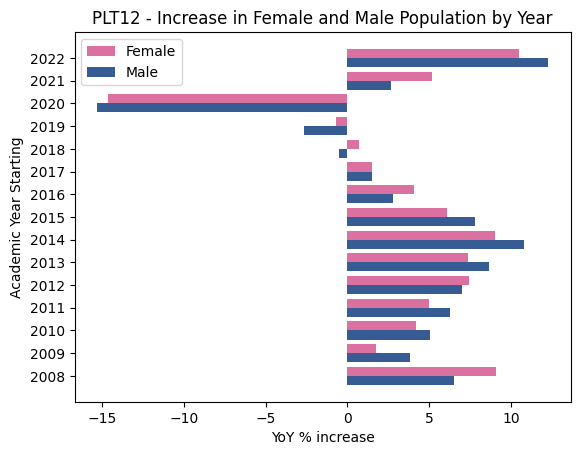

In [0]:
df51 = (
    demographics.select("start_year", "increase female", "increase male")
    .orderBy("start_year")
    .collect()
)

# Filter out rows with None values
df51 = [
    row
    for row in df51
    if row["increase female"] is not None and row["increase male"] is not None
]

# Extract data
start_years = [row["start_year"] for row in df51]
fi = [row["increase female"] for row in df51]
mi = [row["increase male"] for row in df51]

plt.barh(start_years, fi, label="Female", color="#DA71A1", align="edge", height=0.4)
plt.barh(start_years, mi, label="Male", color="#365C93", align="edge", height=-0.4)
plt.xlabel("YoY % increase")
plt.ylabel("Academic Year Starting")
plt.title("PLT12 - Increase in Female and Male Population by Year")
plt.legend()

plt.show()

In PLT 12, the number of female and male international students in the US showed overall growth over the years. Initially, there appears to be a relatively balanced representation of female and male international students; however, this balance shifts after 2016. Notably, between 2016 and 2022, there has been a discernible increase in female enrollments, reaching an all-time high in 2022. The significant declines observed in both female and male international student numbers in 2020 can be attributed to the impact of the COVID-19 pandemic on enrollment.

### 5.2 Find the distribution of international students based on marital status.

In [0]:
# Define the window specification
windowSpec = Window.orderBy("start_year")

# Add marriage percentage column
status = status.withColumn(
    "married %", (col("married") / (col("married") + col("single"))) * 100
)

# Add single percentage column
status = status.withColumn(
    "single %", (col("single") / (col("married") + col("single"))) * 100
)

# Add increase in single percentage by year
status = status.withColumn(
    "increase single",
    (col("single") - lag(col("single")).over(windowSpec))
    / lag(col("single")).over(windowSpec)
    * 100,
)

# Add increase in married percentage by year
status = status.withColumn(
    "increase married",
    (col("married") - lag(col("married")).over(windowSpec))
    / lag(col("married")).over(windowSpec)
    * 100,
)

# Select columns to display
status = status.select(
    "start_year",
    "single",
    "single %",
    "increase single",
    "married",
    "married %",
    "increase married",
)

display(status)

start_year single single % increase single married married % increase married 2007 543958 87.20000641226025 null 79847 12.799993587739758 null 2008 591694 88.10004526396035 8.775677533927253 79922 11.899954736039643 0.09392964043733641 2009 615612 89.09994311956615 4.042292130729735 75311 10.900056880433855 -5.769375140762243 2010 653842 90.39994359007683 6.210080375301326 69435 9.60005640992317 -7.802313075115189 2011 690339 90.30000196207955 5.581929579317327 74156 9.699998037920457 6.799164686397351 2012 744237 90.80003025703843 7.807468504604259 75407 9.199969742961578 1.6869841954797995 2013 806307 90.99996388473815 8.340085214790449 79745 9.000036115261858 5.7527815720026 2014 886208 90.90002728412207 9.909500971714248 88718 9.099972715877923 11.252116120132923 2015 950937 91.09996848172946 7.304041489131221 92902 8.900031518270538 4.716066638111769 2016 970940 90.00001853873948 2.103504227935184 107882 9.999981461260523 16.124518309616583 2017 999545 91.29999123121104 2.9461140750200836 95247 8.700008768788956 -11.711870376893273 2018 1002199 91.50003788919739 0.2655208119694461 93100 8.49996211080262 -2.254139237981249 2019 987305 91.79996950244352 -1.4861319957413648 88191 8.200030497556476 -5.272824919441461 2020 827256 90.5000027349455 -16.2106947701065 86839 9.499997265054509 -1.5330362508646007 2021 861255 90.79997343226651 4.109852331080101 87264 9.200026567733488 0.4894114395605661 2022 966270 91.40001589121329 12.193252869359249 90918 8.599984108786705 4.1872937293729375

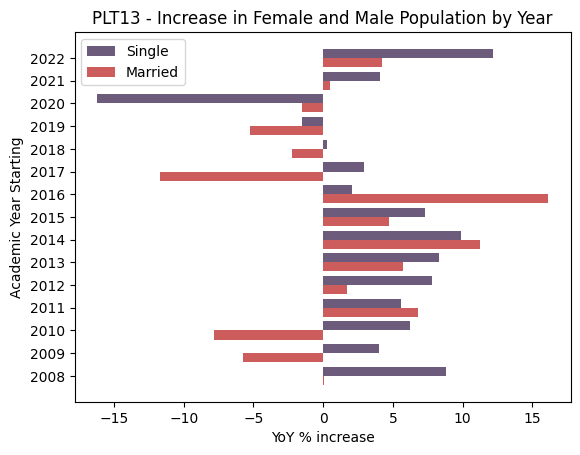

In [0]:
df52 = (
    status.select("start_year", "increase single", "increase married")
    .orderBy("start_year")
    .collect()
)

# Filter out rows with None values
df52 = [
    row
    for row in df52
    if row["increase single"] is not None and row["increase married"] is not None
]

# Extract data
start_years = [row["start_year"] for row in df52]
Si = [row["increase single"] for row in df52]
Mi = [row["increase married"] for row in df52]

plt.barh(start_years, Si, label="Single", color="#6C5B7B", align="edge", height=0.4)
plt.barh(start_years, Mi, label="Married", color="#CD5C5C", align="edge", height=-0.4)
plt.xlabel("YoY % increase")
plt.ylabel("Academic Year Starting")
plt.title("PLT13 - Increase in Female and Male Population by Year")
plt.legend()

plt.show()

In PLT 13 we  can see that initally, there is a higher increase of single international students compared to married individuals. Although this pattern fluctuates over time, particularly noteworthy is the greater volatility of married international students compared to their single counterparts. This may be attributed to factors such as the added complexity of relocation for married couples that single individuals may not share. In recent years, there has been a noticeable rise in both single and married international students, with 2022 marking particularly notable increases for both demographic groups.

## 6. Find the most popular source of funding for international students

In [0]:
funding_source = (
    funding.where((col("start_year") >= 2000) & (col("source_type") == "International"))
    .groupBy("start_year", "source_of_fund")
    .agg((sum(col("students")) / 1000).alias("Students"))
    .orderBy("start_year", "Students")
)

# Display the result
display(funding_source)

start_year source_of_fund Students 2000 International Organization 2.346 2000 Foreign Private Sponsor 13.07 2000 Foreign Government or University 22.051 2000 Personal and Family 353.378 2001 International Organization 2.107 2001 Foreign Private Sponsor 11.843 2001 Foreign Government or University 21.532 2001 Personal and Family 386.203 2002 International Organization 1.539 2002 Foreign Government or University 16.311 2002 Foreign Private Sponsor 18.595 2002 Personal and Family 377.088 2003 International Organization 4.7 2003 Foreign Private Sponsor 11.852 2003 Foreign Government or University 12.695 2003 Personal and Family 377.796 2004 International Organization 1.449 2004 Foreign Private Sponsor 6.718 2004 Foreign Government or University 15.006 2004 Personal and Family 345.22 2005 International Organization 1.455 2005 Foreign Private Sponsor 8.831 2005 Foreign Government or University 14.352 2005 Personal and Family 350.458 2006 International Organization 1.731 2006 Foreign Private Sponsor 6.569 2006 Foreign Government or University 18.858 2006 Personal and Family 360.017 2007 International Organization 1.261 2007 Foreign Private Sponsor 6.42 2007 Foreign Government or University 21.125 2007 Personal and Family 389.072 2008 International Organization 1.394 2008 Foreign Private Sponsor 9.299 2008 Foreign Government or University 24.023 2008 Personal and Family 427.07 2009 International Organization 1.792 2009 Foreign Private Sponsor 9.465 2009 Foreign Government or University 30.892 2009 Personal and Family 422.088 2010 International Organization 1.629 2010 Foreign Private Sponsor 7.461 2010 Foreign Government or University 40.641 2010 Personal and Family 455.673 2011 International Organization 1.573 2011 Foreign Private Sponsor 7.51 2011 Foreign Government or University 34.72 2011 Personal and Family 485.957 2012 International Organization 1.256 2012 Foreign Private Sponsor 9.216 2012 Foreign Government or University 57.576 2012 Personal and Family 517.078 2013 International Organization 1.508 2013 Foreign Private Sponsor 9.85 2013 Foreign Government or University 65.922 2013 Personal and Family 567.455 2014 International Organization 2.177 2014 Foreign Private Sponsor 9.805 2014 Foreign Government or University 68.654 2014 Personal and Family 622.691 2015 International Organization 1.706 2015 Foreign Private Sponsor 9.207 2015 Foreign Government or University 76.239 2015 Personal and Family 685.82 2016 International Organization 2.025 2016 Foreign Private Sponsor 7.762 2016 Foreign Government or University 62.037 2016 Personal and Family 651.329 2017 International Organization 1.34 2017 Foreign Private Sponsor 6.628 2017 Foreign Government or University 56.453 2017 Personal and Family 641.411 2018 International Organization 1.25 2018 Foreign Private Sponsor 6.426 2018 Foreign Government or University 46.729 2018 Personal and Family 623.871 2019 International Organization 0.665 2019 Foreign Private Sponsor 6.393 2019 Foreign Government or University 38.235 2019 Personal and Family 604.434 2020 International Organization 0.689 2020 Foreign Private Sponsor 4.273 2020 Foreign Government or University 22.907 2020 Personal and Family 494.301 2021 International Organization 0.764 2021 Foreign Private Sponsor 4.617 2021 Foreign Government or University 23.037 2021 Personal and Family 526.083 2022 International Organization 0.511 2022 Foreign Private Sponsor 7.42 2022 Foreign Government or University 23.106 2022 Personal and Family 601.458

Databricks visualization. Run in Databricks to view.

PLT14 underscores the crucial role of family support in facilitating studying abroad, particularly evident in the majority of human capital migration to the US. Additionally, there is a slight increase in funding offered by foreign governments and universities for international students, highlighting the importance for the origin countries to enhance their national knowledge base by encouraging studies abroad.

In [0]:
funding_source = (
    funding.where((col("start_year") >= 2000) & (col("source_type") == "U.S."))
    .groupBy("start_year", "source_of_fund")
    .agg((sum(col("students")) / 1000).alias("Students"))
    .orderBy("start_year", "Students")
)

# Display the result
display(funding_source)

start_year source_of_fund Students 2000 U.S. Government 3.584 2000 Current Employment 12.52 2000 U.S. Private Sponsor 13.351 2000 U.S. College or University 122.026 2001 U.S. Government 4.0 2001 Current Employment 10.411 2001 U.S. Private Sponsor 15.117 2001 U.S. College or University 130.533 2002 U.S. Government 3.236 2002 Current Employment 10.215 2002 U.S. Private Sponsor 13.855 2002 U.S. College or University 135.137 2003 U.S. Government 2.827 2003 Current Employment 6.758 2003 U.S. Private Sponsor 12.051 2003 U.S. College or University 141.324 2004 U.S. Government 3.27 2004 Current Employment 18.415 2004 U.S. Private Sponsor 27.703 2004 U.S. College or University 144.952 2005 U.S. Government 2.492 2005 U.S. Private Sponsor 8.459 2005 Current Employment 18.549 2005 U.S. College or University 156.927 2006 U.S. Government 3.58 2006 U.S. Private Sponsor 7.927 2006 Current Employment 22.46 2006 U.S. College or University 157.005 2007 U.S. Government 3.343 2007 U.S. Private Sponsor 5.751 2007 Current Employment 29.453 2007 U.S. College or University 161.381 2008 U.S. Government 4.077 2008 U.S. Private Sponsor 7.164 2008 Current Employment 35.512 2008 U.S. College or University 157.371 2009 U.S. Government 4.695 2009 U.S. Private Sponsor 7.26 2009 Current Employment 37.942 2009 U.S. College or University 169.791 2010 U.S. Government 4.427 2010 U.S. Private Sponsor 5.865 2010 Current Employment 34.618 2010 U.S. College or University 168.012 2011 U.S. Private Sponsor 3.584 2011 U.S. Government 3.866 2011 Current Employment 43.761 2011 U.S. College or University 180.033 2012 U.S. Private Sponsor 4.907 2012 U.S. Government 5.921 2012 Current Employment 48.773 2012 U.S. College or University 170.174 2013 U.S. Private Sponsor 4.645 2013 U.S. Government 4.666 2013 Current Employment 52.604 2013 U.S. College or University 174.322 2014 U.S. Private Sponsor 4.162 2014 U.S. Government 4.363 2014 Current Employment 56.166 2014 U.S. College or University 199.785 2015 U.S. Private Sponsor 3.049 2015 U.S. Government 3.711 2015 Current Employment 74.885 2015 U.S. College or University 181.476 2016 U.S. Private Sponsor 3.049 2016 U.S. Government 5.687 2016 U.S. College or University 162.377 2016 Current Employment 177.405 2017 U.S. Government 2.5 2017 U.S. Private Sponsor 2.619 2017 U.S. College or University 172.848 2017 Current Employment 205.574 2018 U.S. Government 2.002 2018 U.S. Private Sponsor 2.8 2018 U.S. College or University 183.374 2018 Current Employment 225.1 2019 U.S. Government 2.008 2019 U.S. Private Sponsor 2.647 2019 U.S. College or University 182.451 2019 Current Employment 227.128 2020 U.S. Government 1.04 2020 U.S. Private Sponsor 1.853 2020 U.S. College or University 168.007 2020 Current Employment 207.559 2021 U.S. Private Sponsor 1.865 2021 U.S. Government 1.971 2021 Current Employment 187.64 2021 U.S. College or University 191.355 2022 U.S. Government 1.676 2022 U.S. Private Sponsor 2.38 2022 Current Employment 201.259 2022 U.S. College or University 207.609

Databricks visualization. Run in Databricks to view.

On the contrary, PLT15 demonstrates that U.S. citizens traditionally depended on funding from U.S. colleges or universities. However, this pattern has shifted with the emergence of employer-funded education, underscoring a societal shift wherein companies opt to invest in their employees whenever feasible.